# Advance Regression Assignment
    
### **Problem Statement**

Surprise Housing, a data-driven US housing company, is expanding into the Australian market. Leveraging data analytics, the company aims to acquire properties at prices below market value and resell them for a profit. To facilitate this venture, Surprise Housing has compiled a dataset from the Australian housing sales records.

### **Objectives of the Case Study**

- The task is to develop a predictive model for house pricing using the provided variables. This model will serve as a tool for the company’s management to decipher the relationship between house prices and influencing factors.
- By doing so, the company can tailor its business strategy to focus on profitable segments. Additionally, the model will offer valuable insights into the pricing trends within the Australian housing market.


## 1. Import Libraries

In [1]:
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Basic libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Libraries for model building
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, scale
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Libraries for model evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## 2. Reading and Understanding the Data

### 2.1 Dataset Loading

In [2]:
##Read housing dataset as 'housing_df'
file_path = r"D:\Upgrad Docs\House Prediction\train.csv"
housing_df = pd.read_csv(file_path)
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### 2.2 Data Observation and Understanding

In [3]:
##Check shape of the dataset
total_records= housing_df.shape[0]  #storing total no. of records in a variable
housing_df.shape

(1460, 81)

In [4]:
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

**Observations:**

1. The dataset contains `1460 rows and 81 columns`.
2. Here 43 Categorical, 38 Numerical columns out of which 35 Integer type and 3 Float type column.

These observations provide a useful overview of the dataset’s characteristics.

## 3. Data Quality Check

### 3.1 Duplicate check

In [7]:
##Checking and dropping duplicated records(if any)
len(housing_df[housing_df.duplicated()])

0

**Conclusion:** There are `no duplicate values` in the dataset.

### 3.2 Check for null values

#### 3.2.1 Identify null values

In [8]:
##Check null values if any(column wise: missing value percentage)
missing_val_cols_prcnt = round(100*housing_df.isnull().sum()/len(housing_df.index),2)
missing = pd.DataFrame({'Percentage':missing_val_cols_prcnt[missing_val_cols_prcnt!=0]})
missing

Percentage
LotFrontage        17.74
Alley              93.77
MasVnrType          0.55
MasVnrArea          0.55
BsmtQual            2.53
BsmtCond            2.53
BsmtExposure        2.60
BsmtFinType1        2.53
BsmtFinType2        2.60
Electrical          0.07
FireplaceQu        47.26
GarageType          5.55
GarageYrBlt         5.55
GarageFinish        5.55
GarageQual          5.55
GarageCond          5.55
PoolQC             99.52
Fence              80.75
MiscFeature        96.30

In [9]:
#missing values dataframe (sorting values for graph)
my_cols = missing.index
vals = missing['Percentage']
missing_df = pd.DataFrame({'features':my_cols,'percent':vals})
missing_df = missing_df.sort_values(by='percent', ascending=False)

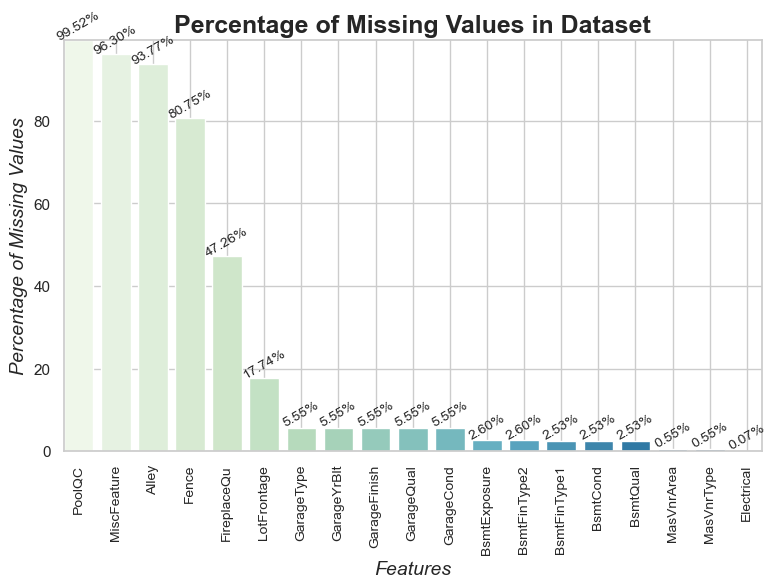

In [10]:
# Displaying the percentage of missing values in the 'df' housing dataset using a bar plot
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 6))
missing_values_bar = sns.barplot(x=missing_df['features'], y=missing_df['percent'],palette='GnBu')

# Annotating each bar with the percentage of missing values
for bar in missing_values_bar.patches:
    height = bar.get_height()
    missing_values_bar.annotate(f'{height:.2f}%', (bar.get_x() + bar.get_width() / 2, height), 
                            ha='center', va='center', fontsize=10, rotation=30, 
                            textcoords='offset points', xytext=(0, 10))

# Setting up the plot's aesthetics
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Features', fontsize=14, fontstyle='italic')
plt.ylabel('Percentage of Missing Values', fontsize=14, fontstyle='italic')
plt.title('Percentage of Missing Values in Dataset', fontsize=18, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.autoscale(enable=True, axis='both', tight=True)
plt.show()


**Conclusion:** The dataset contains `missing` or `null values` in multiple columns.

#### 3.2.2 Examine the null values for Categorical features

The columns listed above exhibit missing values along with their corresponding percentages. However, certain columns contain missing values that are significant. We should examine these further.

In [11]:
# Analyzing missing values in categorical columns (object data type only).

# Selecting categorical columns with object data type
categorical_columns_with_nulls = housing_df.select_dtypes(include=['object'])

# Calculating the percentage of missing values for these columns
null_percentage_in_categorical = (categorical_columns_with_nulls.isnull().mean() * 100).round(2)

# Filtering out columns with no missing values
significant_nulls_in_categorical = null_percentage_in_categorical[null_percentage_in_categorical > 0]

# Displaying the result
significant_nulls_in_categorical

Alley           93.77
MasVnrType       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

#### 3.2.3 Handling the null values which are meaningful in Categorical Feature

In [12]:
# Handling 'meaningful missing' values by assigning 'None' to indicate the feature's absence.

# List of categorical columns where nulls have meaning as per the data dictionary
columns_with_meaningful_nulls = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
    'MiscFeature', 'Electrical'
]

# Replacing nulls with 'None' in the specified columns
housing_df[columns_with_meaningful_nulls] = housing_df[columns_with_meaningful_nulls].fillna('None')

#### 3.2.4 Re-evaluating the null values for categorical features

In [13]:
# Evaluating missing values in categorical features (only those with 'object' data type).

# Isolating categorical features of 'object' data type
object_type_columns = housing_df.select_dtypes(include=['object'])

# Calculating the percentage of missing values for these features
percentage_missing_values = (object_type_columns.isnull().sum() / object_type_columns.shape[0] * 100).round(2)

# Filtering to include only features with missing values
non_zero_missing_values = percentage_missing_values[percentage_missing_values > 0]

# Displaying the percentages of missing values
non_zero_missing_values


Series([], dtype: float64)

**Conclusion:** All the `missing` or `null values` for cateorical features are taken care of.

#### 3.2.5 Examine the null values for Numerical features

In [14]:
# Examining missing values in numerical columns.

# Filtering numerical columns (integers and floats)
numerical_columns_with_nulls = housing_df.select_dtypes(include=[np.number])

# Calculating the percentage of missing values in these columns
percentage_of_missing_values = (numerical_columns_with_nulls.isnull().sum() / numerical_columns_with_nulls.shape[0] * 100).round(2)

# Isolating columns with missing values
columns_with_missing_values = percentage_of_missing_values[percentage_of_missing_values > 0]

# Displaying the result
columns_with_missing_values

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [15]:
# Displaying statistics for 'LotFrontage'
lot_frontage_stats = housing_df['LotFrontage'].describe(percentiles=[.1, .25, .5, .75, .85, .9, .95, .98, .99, 1])
print(f"Statistics for LotFrontage:\n{lot_frontage_stats}\n")

# Displaying statistics for 'MasVnrArea'
mas_vnr_area_stats = housing_df['MasVnrArea'].describe(percentiles=[.1, .25, .5, .75, .85, .9, .95, .98, .99, 1])
print(f"Statistics for MasVnrArea:\n{mas_vnr_area_stats}")

Statistics for LotFrontage:
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
25%        59.000000
50%        69.000000
75%        80.000000
85%        90.000000
90%        96.000000
95%       107.000000
98%       124.000000
99%       141.000000
100%      313.000000
max       313.000000
Name: LotFrontage, dtype: float64

Statistics for MasVnrArea:
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
85%       262.350000
90%       335.000000
95%       456.000000
98%       650.980000
99%       791.920000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [16]:
# Calculating the median for 'MasVnrArea' without zero values for a more accurate measure.
non_zero_mas_vnr_area = housing_df['MasVnrArea'][housing_df['MasVnrArea'] > 0]
mas_vnr_area_statistics = non_zero_mas_vnr_area.describe(percentiles=[.1, .25, .5, .75, .85, .9, .95, .98, .99, 1])
print("Non-Zero MasVnrArea Statistics:\n", mas_vnr_area_statistics)

Non-Zero MasVnrArea Statistics:
 count     591.000000
mean      254.739425
std       205.144174
min         1.000000
10%        70.000000
25%       113.000000
50%       203.000000
75%       330.500000
85%       424.500000
90%       481.000000
95%       650.500000
98%       862.000000
99%      1032.600000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


**Observation:**

Given the presence of outliers in `‘LotFrontage’` and `‘MasVnrArea’`: 

(i) The `‘LotFrontage’` should be imputed using the median value since the **mean (70.05)** and **median (69)** values are nearly identical. <br>
(ii) Considering the `‘MasVnrArea’` has numerous entries at 0.0, it’s prudent to evaluate the statistics without these entries. The null values should be filled in using the **median value of 203** to account for the outliers.

#### 3.2.6 Handling the null values for numerical features

In [17]:
# Filling missing values in 'LotFrontage' and 'MasVnrArea' with their median values

# Calculate the median values excluding zeros for 'MasVnrArea'
mas_vnr_area_median = housing_df[housing_df['MasVnrArea'] > 0]['MasVnrArea'].median()

# Fill missing values with the median
housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median(), inplace=True)
housing_df['MasVnrArea'].fillna(mas_vnr_area_median, inplace=True)

In [18]:
# Temporarily setting missing 'GarageYrBlt' values to 0, to be addressed later

# Fill missing values with 0 and convert to integer type
housing_df['GarageYrBlt'].fillna(value=0, inplace=True)
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].apply(int)

#### 3.2.7 Re-evaluating the null values for numerical features

In [19]:
# Re-Examining missing values in numerical columns.

# Filtering numerical columns (integers and floats)
numerical_columns_with_nulls = housing_df.select_dtypes(include=[np.number])

# Calculating the percentage of missing values in these columns
percentage_of_missing_values = (numerical_columns_with_nulls.isnull().sum() / numerical_columns_with_nulls.shape[0] * 100).round(2)

# Isolating columns with missing values
columns_with_missing_values = percentage_of_missing_values[percentage_of_missing_values > 0]

# Displaying the result
columns_with_missing_values

Series([], dtype: float64)

**Conclusion:** All the `missing` or `null values` for numerical features are taken care of.

### 3.3 Derived features

#### 3.3.1 Remodelled status

In [20]:
# Adding a column 'WhetherRemodelled' to indicate remodeling status based on 'YearBuilt' and 'YearRemodAdd'

# Function to determine remodeling status
def check_remodel_status(row):     #Based on the difference between remodelled and built years
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0     # House has not been remodeled
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1     # House has been remodeled
    else:
        return 2    # Data needs further inspection

# Apply the function to each row in the DataFrame    
housing_df['WhetherRemodelled'] = housing_df.apply(check_remodel_status, axis=1)

# Display the first few rows of the DataFrame
housing_df.head()    

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [21]:
# Verifying the distribution of 'WhetherRemodelled' column values
housing_df.WhetherRemodelled.value_counts()

0    764
1    696
Name: WhetherRemodelled, dtype: int64

#### 3.3.2 Age of the property

In [22]:
# Calculating the property's age at the time of sale and adding it as a new column

# Function to calculate age of property
def calculate_property_age(property_record):
    return property_record['YrSold'] - property_record['YearBuilt']

# Apply the function to the DataFrame and create the new column
housing_df['PropertyAge'] = housing_df.apply(calculate_property_age, axis=1)

# Display the first few rows to verify the new column
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#### 3.3.3 Remove the original Columns

In [23]:
# Removing original columns that are no longer needed after feature engineering
columns_to_remove = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']
housing_df.drop(columns=columns_to_remove, inplace=True)

# Displaying the updated DataFrame
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4          Gd             9        Typ  

### 3.4 Addressing Imbalance in Data

#### 3.4.1 For Categorical Attributes - Object 

Eliminating categorical attributes of object type that exhibit over 80% of their data corresponding to a singular value.

In [24]:
# Function to identify and remove categorical features dominated by a single value.

def identify_dominant_categories(dataframe, threshold):
    dominant_categories = []
    object_type_columns = dataframe.select_dtypes(include=['object'])
    for column in object_type_columns:
        most_frequent_count = object_type_columns[column].value_counts().max()
        if most_frequent_count > (threshold * len(dataframe) / 100):
            dominant_categories.append(column)
    return dominant_categories

# Identifying categorical features with dominance above 80%
dominant_features_to_remove = identify_dominant_categories(housing_df, 80)
print("Categorical object type columns to be removed:", dominant_features_to_remove)
print("\nCount of categorical object type columns to be removed:", len(dominant_features_to_remove), "\n")

# Removing the identified dominant categorical features from the dataframe
housing_df.drop(dominant_features_to_remove, axis=1, inplace=True)
housing_df.head()


Categorical object type columns to be removed: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Count of categorical object type columns to be removed: 24 



Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0      CollgCr     2Story            7            5     Gable     VinylSd   
1      Veenker     1Story            6            8     Gable     MetalSd   
2      CollgCr     2Story            7            5     Gable     VinylSd   
3      Crawfor     2Story            7            5     Gable     Wd Sdng   
4      NoRidge     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ         706           0        150          856   
1           Gd          ALQ         978           0        284         1262   
2           Mn          GLQ         486           0        434          920   
3           No          ALQ         216           0        540          756   
4           Av          GLQ         655           0        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        Ex       856       854             0       1710             1   
1        Ex      1262         0             0       1262             0   
2        Ex       920       866             0       1786             1   
3        Gd       961       756             0       1717             1   
4        Ex      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd  Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  \
0             8           0        None     Attchd          RFn           2   
1             6           1          TA     Attchd          RFn           2   
2             6           1          TA     Attchd          RFn           2   
3             7           1          Gd     Detchd          Unf           3   
4             9           1          TA     Attchd          RFn           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  SalePrice  WhetherRemodelled  PropertyAge  
0         0        0       2     208500                  0            5  
1         0        0       5     181500                  0           31  
2         0        0       9     223500                  1            7  
3         0        0       2     140000

In [25]:
housing_df.shape

(1460, 55)

**Conclusion:** The data imbalance is also taken care of by removing the columns which are having `more than 80%` same value

#### 3.4.2 For Numerical Attributes

Eliminating numerical features where a single value represents over 80% of the dataset

In [26]:
# Function to identify numerical columns with skewed data distribution
def identify_skewed_numeric_columns(dataset, threshold_percentage):
    skewed_columns = []
    numeric_columns = dataset.select_dtypes(include=[np.number])
    
    for column in numeric_columns:
        dominant_value_count = numeric_columns[column].value_counts().max()
        if dominant_value_count > (threshold_percentage * len(dataset) / 100):
            skewed_columns.append(column)
    
    return skewed_columns

# Identify numerical columns with more than 80% of data being a single value
columns_with_skewed_data = identify_skewed_numeric_columns(housing_df, 80)
print("Numeric columns to be removed due to skewness:", columns_with_skewed_data)
print("\nTotal number of skewed numeric columns identified:", len(columns_with_skewed_data), "\n")

# Remove the identified skewed columns from the DataFrame
housing_df.drop(columns=columns_with_skewed_data, inplace=True)

# Display the DataFrame to confirm the removal of skewed columns
housing_df.head()

Numeric columns to be removed due to skewness: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Total number of skewed numeric columns identified: 9 



Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0      CollgCr     2Story            7            5     Gable     VinylSd   
1      Veenker     1Story            6            8     Gable     MetalSd   
2      CollgCr     2Story            7            5     Gable     VinylSd   
3      Crawfor     2Story            7            5     Gable     Wd Sdng   
4      NoRidge     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ         706        150          856        Ex   
1           Gd          ALQ         978        284         1262        Ex   
2           Mn          GLQ         486        434          920        Ex   
3           No          ALQ         216        540          756        Gd   
4           Av          GLQ         655        490         1145        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             3          Gd             8           0        None     Attchd   
1             3          TA             6           1          TA     Attchd   
2             3          Gd             6           1          TA     Attchd   
3             3          Gd             7           1          Gd     Detchd   
4             4          Gd             9           1          TA     Attchd   

  GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  \
0          RFn           2         548           0           61       2   
1          RFn           2         460         298            0       5   
2          RFn           2         608           0           42       9   
3          Unf           3         642           0           35       2   
4          RFn           3         836         192           84      12   

   SalePrice  WhetherRemodelled  PropertyAge  
0     208500                  0            5  
1     181500                  0           31  
2     223500                  1            7  
3     140000                  1           91  
4     250000                  0            8

**Conclusion:** The data imbalance is also taken care of by removing the columns which are having `more than 80%` same value

## 4. Data Analysis

### 4.1 Analysis of categorical features

In [27]:
##Creating a dataframe 'df_obj_cat' with object type categorical variables
obj_type_cat = housing_df.select_dtypes(include='object').columns
df_obj_cat = housing_df.loc[:,obj_type_cat]
df_obj_cat.head()

MSZoning LotShape LotConfig Neighborhood HouseStyle RoofStyle Exterior1st  \
0       RL      Reg    Inside      CollgCr     2Story     Gable     VinylSd   
1       RL      Reg       FR2      Veenker     1Story     Gable     MetalSd   
2       RL      IR1    Inside      CollgCr     2Story     Gable     VinylSd   
3       RL      IR1    Corner      Crawfor     2Story     Gable     Wd Sdng   
4       RL      IR1       FR2      NoRidge     2Story     Gable     VinylSd   

  Exterior2nd MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0     VinylSd    BrkFace        Gd      PConc       Gd           No   
1     MetalSd       None        TA     CBlock       Gd           Gd   
2     VinylSd    BrkFace        Gd      PConc       Gd           Mn   
3     Wd Shng       None        TA     BrkTil       TA           No   
4     VinylSd    BrkFace        Gd      PConc       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual FireplaceQu GarageType GarageFinish  
0          GLQ        Ex          Gd        None     Attchd          RFn  
1          ALQ        Ex          TA          TA     Attchd          RFn  
2          GLQ        Ex          Gd          TA     Attchd          RFn  
3          ALQ        Gd          Gd          Gd     Detchd          Unf  
4          GLQ        Ex          Gd          TA     Attchd          RFn

In [28]:
df_obj_cat.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish'],
      dtype='object')

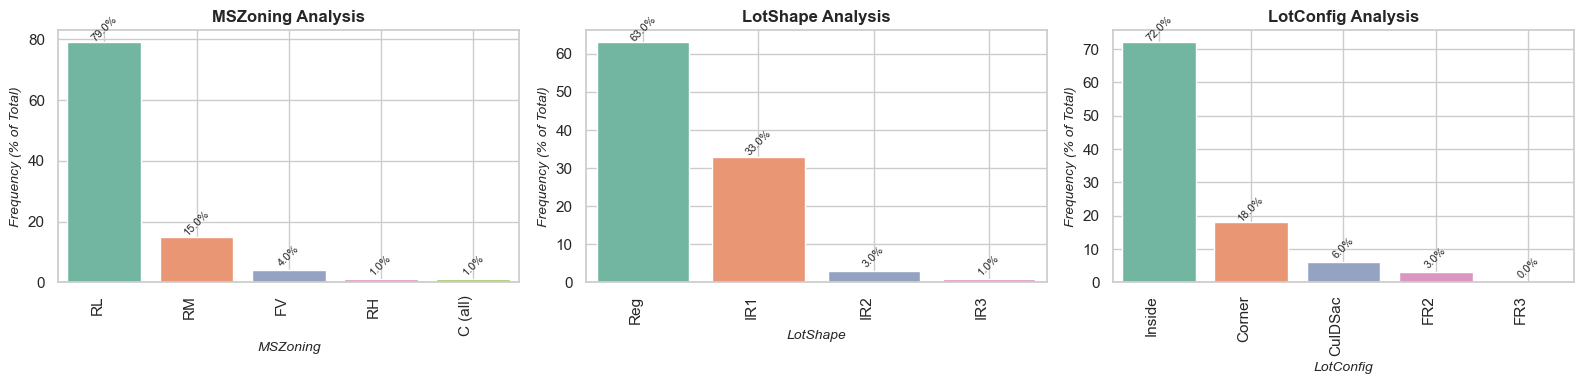

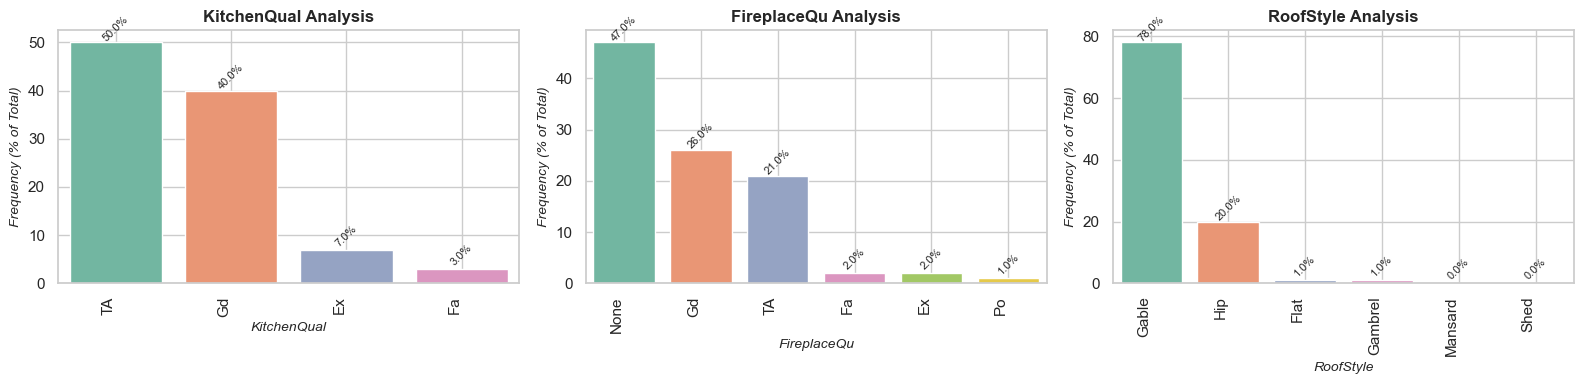

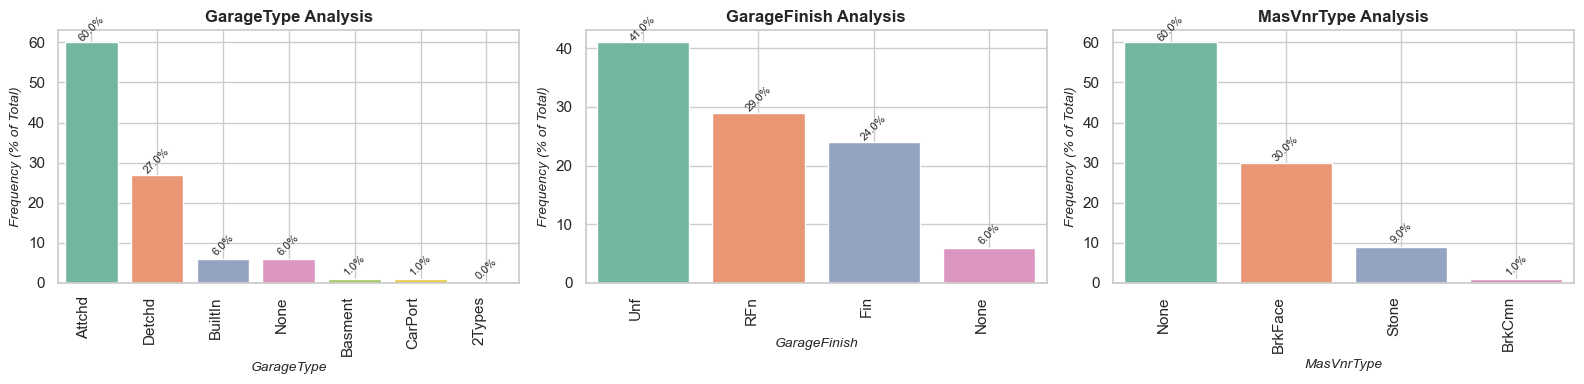

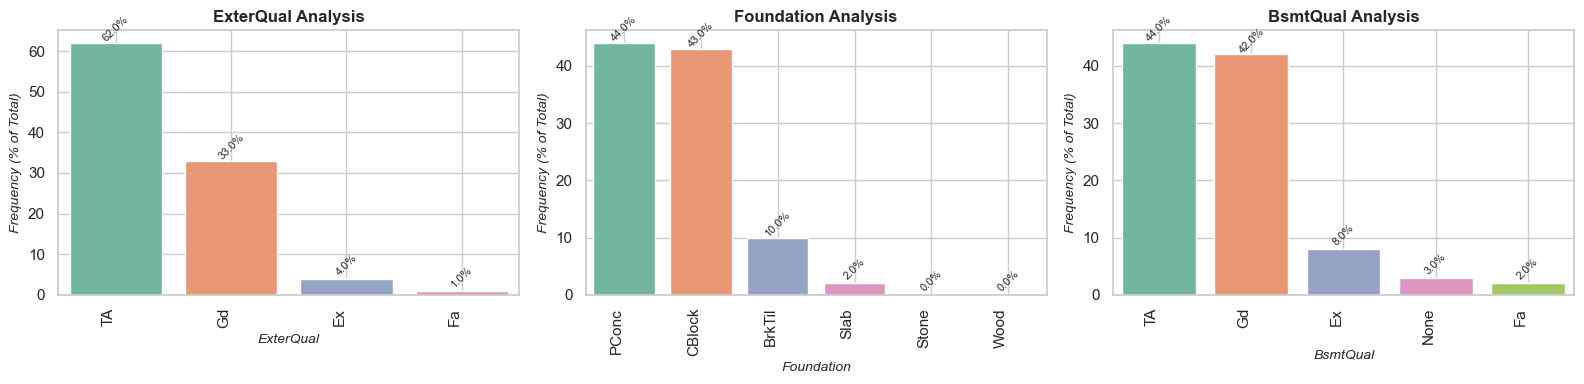

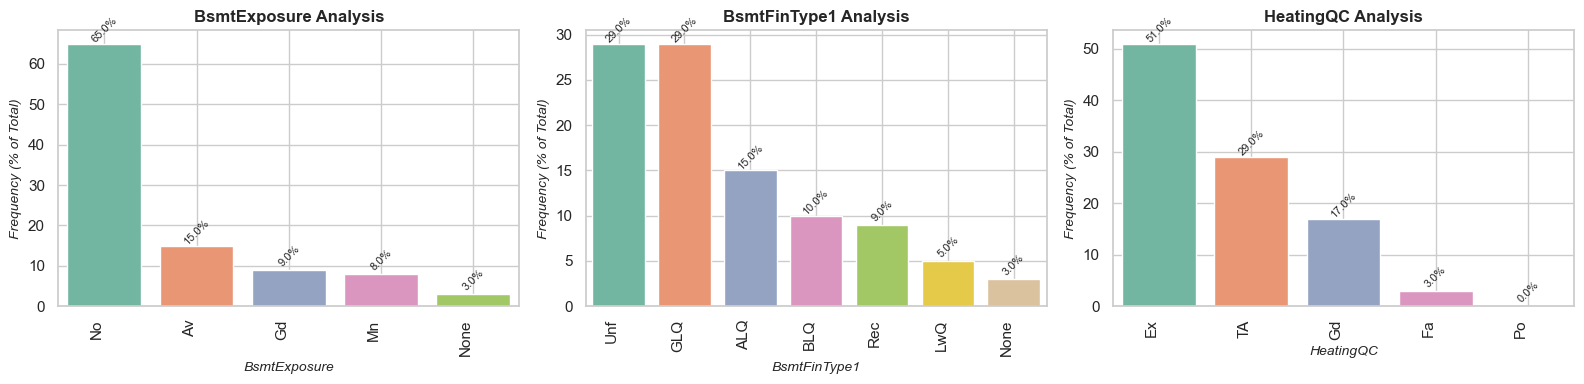

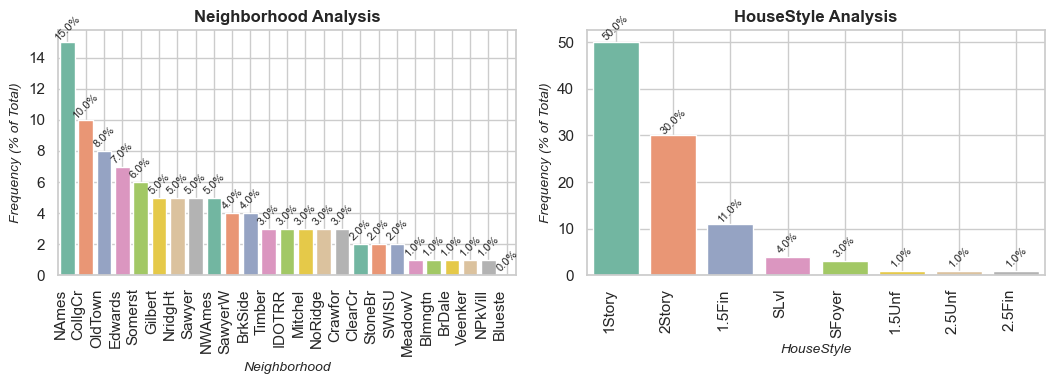

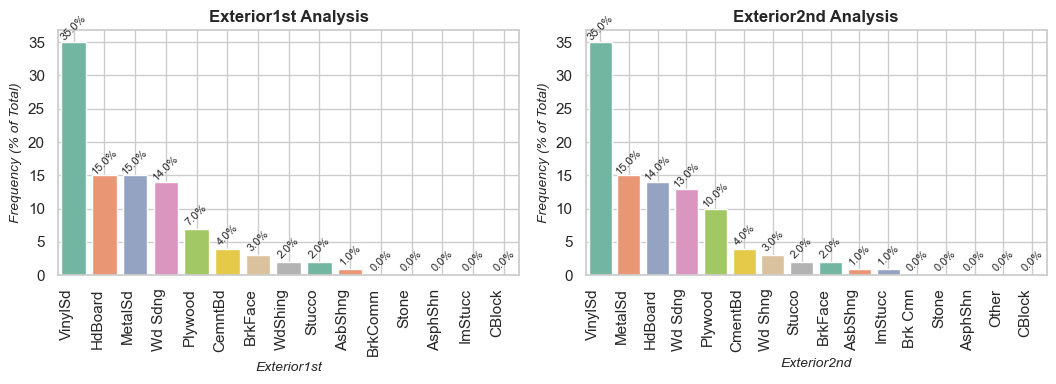

In [29]:
# Function to plot the frequency percentage of categorical variables in a dataset
def plot_categorical_frequency_percentage(data, feature1, feature2, feature3=None):
    data_copy = data.copy()
    sns.set(style='whitegrid')
    plt.figure(figsize=(16, 4))

    # Define a function to create the plots
    def create_plot(feature, subplot_position):
        feature_data = pd.DataFrame((data_copy[feature].value_counts(normalize=True) * 100).round(0).sort_values(ascending=False))
        feature_data.reset_index(inplace=True)
        plot = sns.barplot(x='index', y=feature, data=feature_data, palette='Set2')
        plt.setp(plot.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(feature, fontsize=10, fontstyle='italic')
        plt.ylabel('Frequency (% of Total)', fontsize=10, fontstyle='italic')
        plt.title(f'{feature} Analysis', fontsize=12, fontweight='bold')
        plt.grid(True)
        for patch in plot.patches:
            plot.annotate(format(patch.get_height()) + "%", (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                          ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=45, fontsize=8)

    # Create the first plot
    plt.subplot(131)
    create_plot(feature1, 131)

    # Create the second plot if feature2 is provided
    if feature2:
        plt.subplot(132)
        create_plot(feature2, 132)

    # Create the third plot if feature3 is provided
    if feature3:
        plt.subplot(133)
        create_plot(feature3, 133)

    plt.tight_layout()
    plt.show()

# Example usage of the function
plot_categorical_frequency_percentage(housing_df, 'MSZoning', 'LotShape', 'LotConfig')
plot_categorical_frequency_percentage(housing_df, 'KitchenQual', 'FireplaceQu', 'RoofStyle')
plot_categorical_frequency_percentage(housing_df,'GarageType', 'GarageFinish', 'MasVnrType')
plot_categorical_frequency_percentage(housing_df,'ExterQual','Foundation', 'BsmtQual')
plot_categorical_frequency_percentage(housing_df,'BsmtExposure', 'BsmtFinType1', 'HeatingQC')
plot_categorical_frequency_percentage(housing_df, 'Neighborhood', 'HouseStyle',0)
plot_categorical_frequency_percentage(housing_df,'Exterior1st', 'Exterior2nd', 0) 


**Observations:**<br>
Top preferences include:<br> (1) Sale Zone (MSZoning): Predominantly `'RL' (Residential Low Density)`, with `'RM' (Residential Medium Density)` as the second choice.<br> (2) Shape of Lot (LotShape): Majority are `'Reg' (Regular)` in shape.<br> (3) Configuration of Lot (LotConfig): Most are `'inside' (Inside)` lots.<br> (4) No marked preference for the following attributes:<br> –(i) Quality of Fireplace (FireplaceQu), Type of Masonry Veneer (MasVnrType): Predominantly `'None'`.<br> –(ii) Quality of Kitchen (KitchenQual), Quality of Exterior Material (ExterQual), Height of Basement (BsmtQual): Generally `'TA' (Typical/Average)`.<br> (5) Style of Roof (RoofStyle): Mainly `'Gable'`.<br> (6) Type of Garage (GarageType): Commonly `Attached`.<br> (7) Finish of Garage (GarageFinish): Often `Unfinished`.<br> (8) Type of Foundation: Usually `Poured Concrete`.<br> (9) Basement Finish Type 1 (BsmtFinType1): Either `Good Living Quarters` or `Unfinished`.<br> (10) Quality of Heating (HeatingQC): Frequently `Excellent`.<br> (11) Neighborhood: `North Ames` is most popular, followed by `College Creek`.<br> (12) Style of House (HouseStyle): `One story` homes lead, with `Two story` homes next.<br> (13) Primary Exterior Covering (Exterior1st) and Secondary Exterior Material (Exterior2nd): `Vinyl Siding` is the frontrunner, with `Metal Siding` next in line.<br> (14) Exposure of Basement: Typically `No Exposure`.

In [30]:
housing_df.shape

(1460, 46)

### 4.2 Analysis of numerical features

In [31]:
##Numeric cateogorical variables
numeric_cat_cols = ['MSSubClass','MoSold','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',\
                    'TotRmsAbvGrd','Fireplaces','GarageCars','WhetherRemodelled']

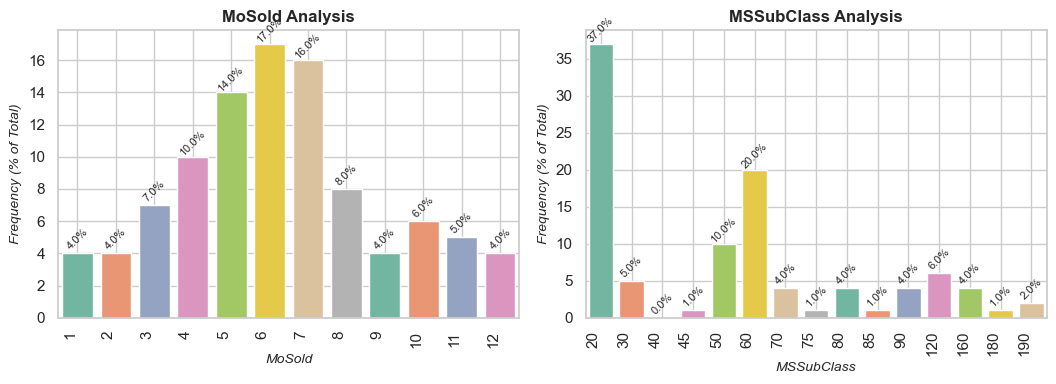

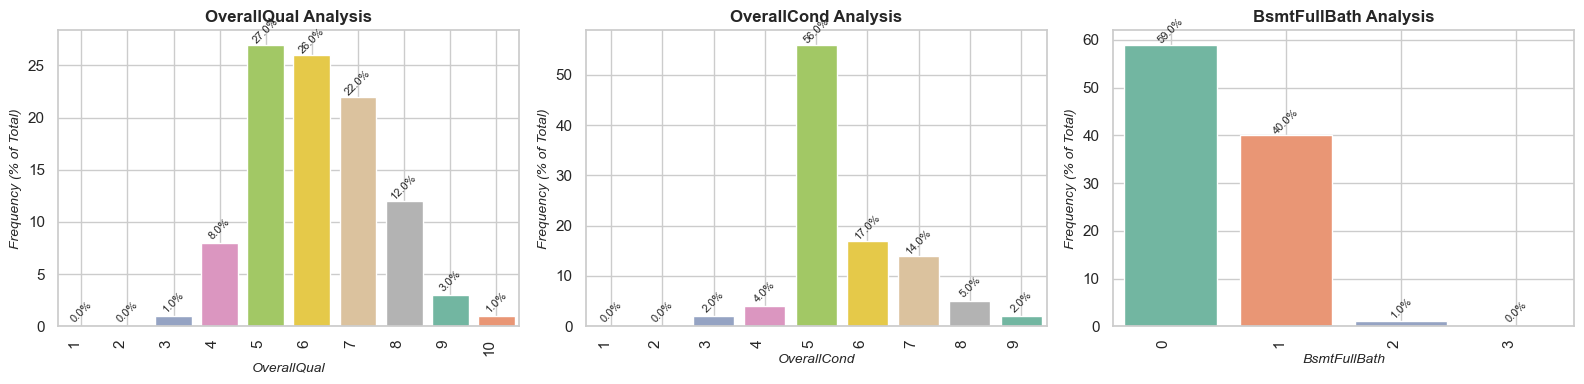

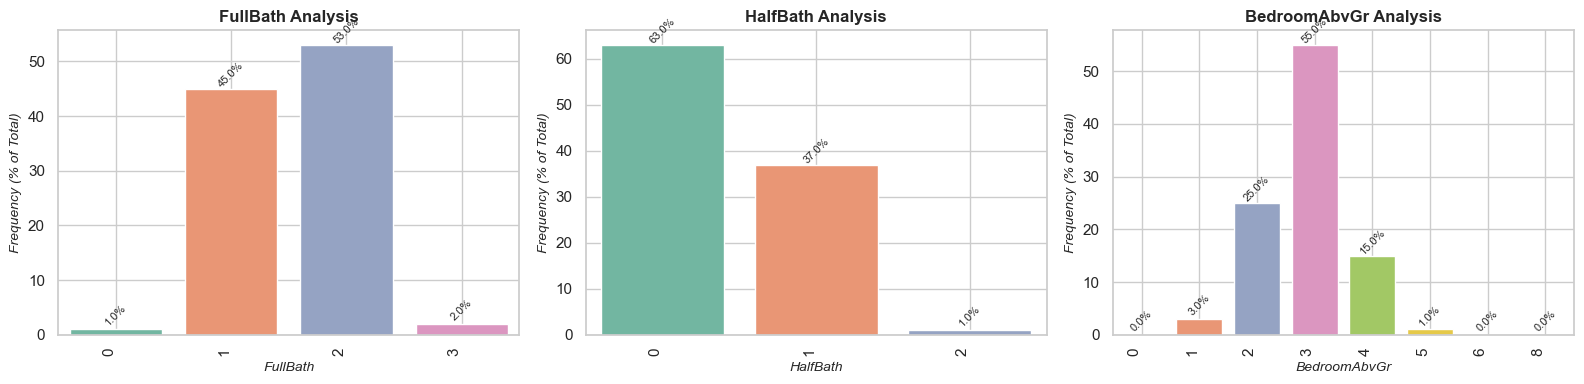

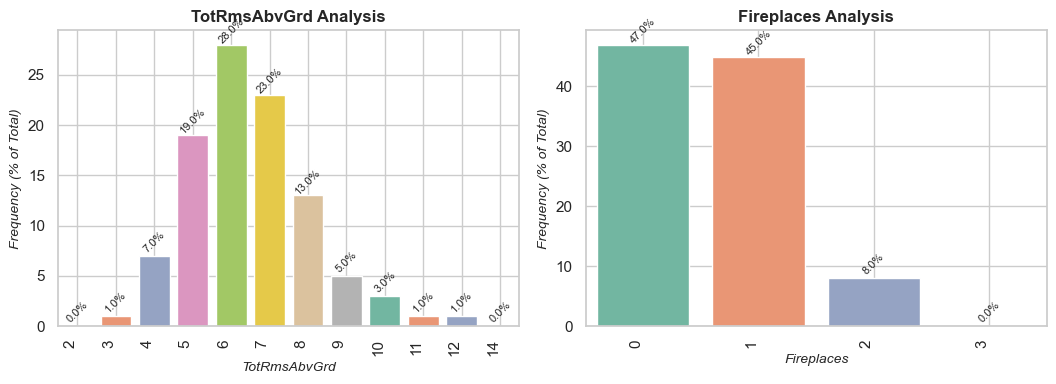

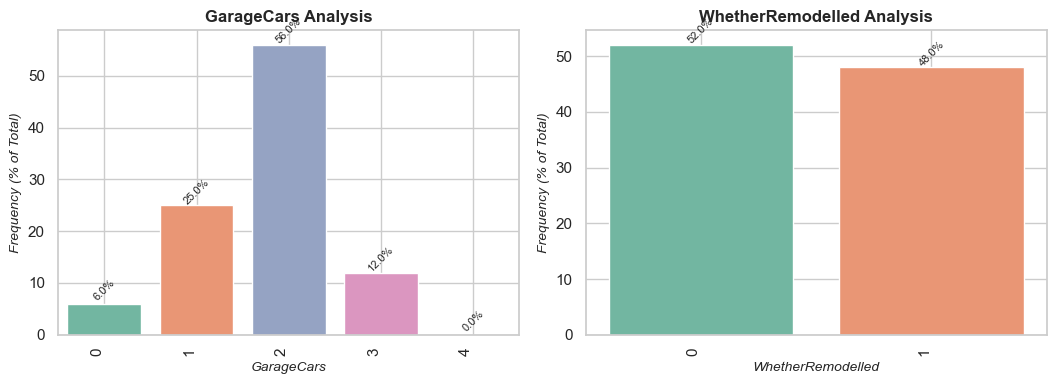

In [32]:
plot_categorical_frequency_percentage(housing_df, 'MoSold', 'MSSubClass',0)
plot_categorical_frequency_percentage(housing_df, 'OverallQual','OverallCond','BsmtFullBath')
plot_categorical_frequency_percentage(housing_df, 'FullBath','HalfBath','BedroomAbvGr')
plot_categorical_frequency_percentage(housing_df, 'TotRmsAbvGrd','Fireplaces',0)
plot_categorical_frequency_percentage(housing_df, 'GarageCars','WhetherRemodelled',0)

**Observations:**

 Top selections observed:<br> (1) Sale Month: `June` leads, with `July` and `May` trailing.<br> (2) Dwelling Type (MSSubClass): The `20` category, representing `1-Story 1946 & Newer All Styles`, is the frontrunner, with `60` or `2-Story 1946 & Newer` next in line.<br> (3) Quality of Materials and Finish: Generally `Average to Above Average`.<br> (4) State of Maintenance: Predominantly `Average`, with a good number being `Above Average`.<br> (5) Bathroom Configuration: (i) Basement Full Bathrooms are mostly `Nonexistent(0)`, then `1`. (ii) Preferred number of Full Bathrooms is `2`, then `1`. (iii) For Half Bathrooms, `None(0)` is common, followed by `1`.<br> (6) Above Ground Bedrooms: `3` is the most common, with `2` as the second choice.<br> (7) Total Above Ground Rooms: `6` rooms are most common, closely followed by `7`.<br> (8) Fireplace Count and Remodeling Status: No clear preference between having `0` or `1` Fireplaces and whether the house has been remodeled.<br> (9) Garage Capacity: `2-car`garages are most common, with `1-car` garages next.<br>

In [33]:
# Excluding 'Id' and 'MoSold' columns from the dataset as they are not essential for the analysis
columns_to_exclude = ['Id', 'MoSold']
housing_df.drop(columns=columns_to_exclude, inplace=True)


### 4.3 Handling Outliers

#### 4.3.1 Identify Outliers

In [34]:
# Evaluating the dataset for potential outliers across all numerical columns
housing_df.describe(percentiles=[.1, .25, .5, .75, .95, .98, .99, 1.0])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
10%      20.000000    49.000000    5000.000000     5.000000     5.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
98%     188.200000   120.820000   25251.620000     9.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
100%    190.000000   313.000000  215245.000000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    104.229452   443.639726   567.240411  1057.429452  1162.626712   
std     180.717988   456.098091   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
10%       0.000000     0.000000    74.900000   636.900000   756.900000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000   
75%     168.000000   712.250000   808.000000  1298.250000  1391.250000   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000   
98%     650.820000  1442.640000  1678.200000  2001.640000  2072.280000   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000   
100%   1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath     FullBath     HalfBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean    346.992466  1515.463699      0.425342     1.565068     0.382877   
std     436.528436   525.480383      0.518911     0.550916     0.502885   
min       0.000000   334.000000      0.000000     0.000000     0.000000   
10%       0.000000   912.000000      0.000000     1.000000     0.000000   
25%       0.000000  1129.500000      0.000000     1.000000     0.000000   
50%       0.000000  1464.000000      0.000000     2.000000     0.000000   
75%     728.000000  1776.750000      1.000000     2.000000     1.000000   
95%    1141.050000  2466.100000      1.000000     2.000000     1.000000   
98%    1318.560000  2782.380000      1.000000     3.000000     1.000000   
99%    1418.920000  3123.480000      2.000000     3.000000     1.000000   
100%   2065.000000  5642.000000      3.000000     3.000000     2.000000   
max    2065.000000  5642.000000      3.000000     3.000000     2.000000   

       BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       2.866438      6.517808     0.613014     1.767123   472.980137   
std        0.815778      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
10%        2.000000      5.000000     0.000000     1.000000   240.000000   
25%        2.000000      5.000000     0.000000     1.000000   334.500000   
50%        3.000000      6.000000     1.000000     2.000000   480.000000   
75%        3.000000      7.000000     1.000000     2.000000   576.000000   
95%        4.000000     10.000000     2.000000     3.000000   850.100000   
98%        4.000000     10.820000     2.000000     3.000000   907.460000   
99%        5.000000

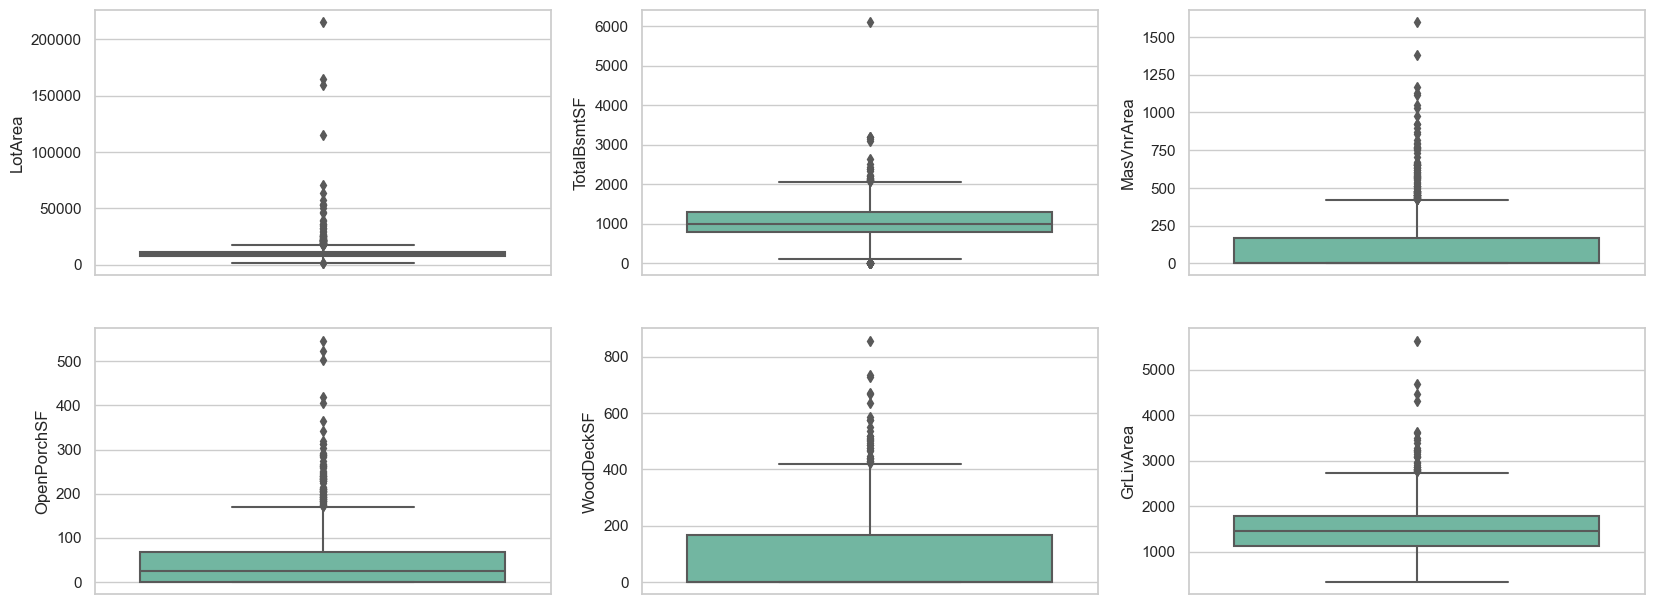

In [35]:
# List of numeric columns to check for outliers
numeric_columns = ['LotArea', 'TotalBsmtSF', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'GrLivArea']

# Set up the figure size
plt.figure(figsize=(20, 20))

# Create a boxplot for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=column, color='b', data=housing_df, palette='Set2')

# Display the plots
plt.show()

In [36]:
housing_df.shape

(1460, 44)

#### 4.3.2 Remove Outliers

In [37]:
def remove_outliers(df, column, threshold):
    quantile_value = df[column].quantile(threshold)
    return df[df[column] < quantile_value]

# Define a dictionary with column names as keys and quantile thresholds as values
outlier_thresholds = {
    'LotArea': 0.98,
    'TotalBsmtSF': 0.99,
    'WoodDeckSF': 0.99,
    'OpenPorchSF': 0.99
}

# Apply the function to each column in the dictionary
for column, threshold in outlier_thresholds.items():
    housing_df = remove_outliers(housing_df, column, threshold)

#### 4.3.3 Data Retained

In [38]:
# Determine the percentage of data retained

print(round(100*(len(housing_df)/total_records),2),"%")

94.93 %


## 5. Data Visualization

### 5.1 Depicting the Distribution of the Dependent Variable: SalePrice


 mu = 176342.76 and sigma = 71616.92



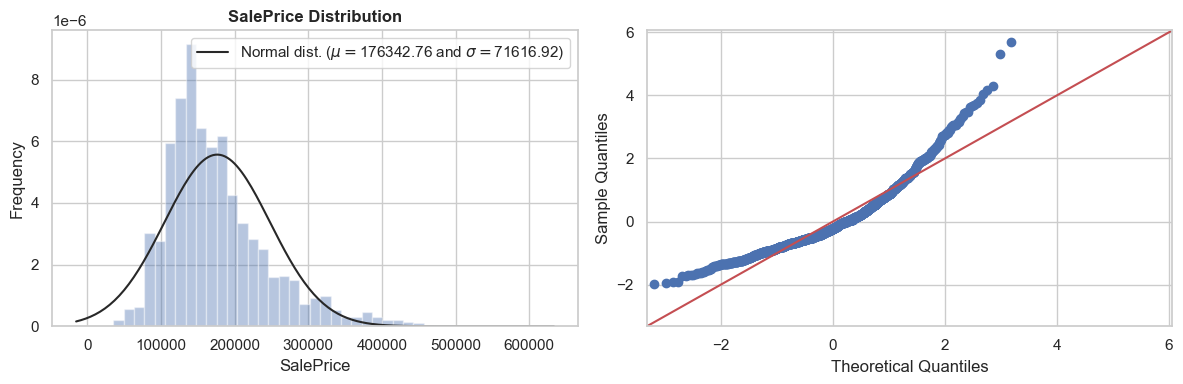

In [39]:
from scipy.stats import norm

# Set up the figure size
plt.figure(figsize=(12, 4))

# Visualize the distribution of 'SalePrice'
plt.subplot(121)
sns.distplot(housing_df['SalePrice'], fit=norm, kde=False)

# Calculate the mean and standard deviation
mu, sigma = norm.fit(housing_df['SalePrice'])
print(f'\n mu = {mu:.2f} and sigma = {sigma:.2f}\n')

# Add a legend with the fitted parameters
plt.legend([f'Normal dist. ($\mu=${mu:.2f} and $\sigma=${sigma:.2f})'], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution', fontweight='bold')

# Generate a QQ-plot for 'SalePrice'
plt.subplot(122)
sm.qqplot(housing_df['SalePrice'], line ='45', fit=True, dist=norm, ax=plt.gca())

plt.tight_layout()
plt.show()

**Observation:** 

The deviation of the data points from the red line in the probability plot indicates a skew in the distribution of the target variable. This suggests the need for a log transformation to normalize the data.


 mu = 12.01 and sigma = 0.38



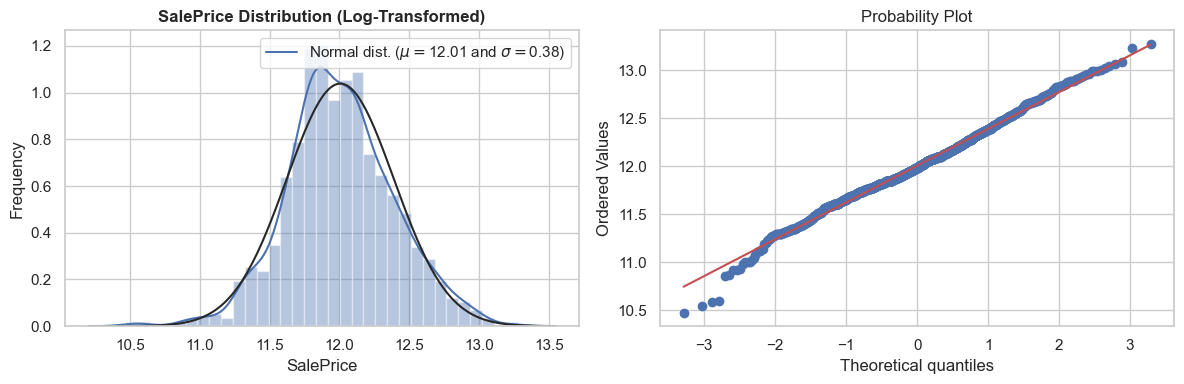

In [40]:
from scipy import stats

# Apply log transformation using numpy's log1p, which adds 1 to each value to prevent log(0)
housing_df["SalePrice"] = np.log1p(housing_df["SalePrice"])

# Set up the figure size
plt.figure(figsize=(12, 4))

# Plot the distribution of 'SalePrice' after log transformation
plt.subplot(121)
sns.distplot(housing_df['SalePrice'], fit=norm)

# Calculate and print the mean and standard deviation
mu, sigma = norm.fit(housing_df['SalePrice'])
print(f'\n mu = {mu:.2f} and sigma = {sigma:.2f}\n')

# Add a legend with the normal distribution parameters
plt.legend([f'Normal dist. ($\mu=${mu:.2f} and $\sigma=${sigma:.2f})'], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution (Log-Transformed)', fontweight='bold')

# Generate a Q-Q plot for 'SalePrice'
plt.subplot(122)
stats.probplot(housing_df['SalePrice'], plot=plt)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Observations:**

1. The transformed ‘SalePrice’ distribution appears to closely resemble a normal distribution in the updated normal distribution plot.
2. The alignment of the data points with the red line in the probability plot suggests that the log transformation has effectively addressed the skewness in the ‘SalePrice’ data, with minor deviations remaining.

### 5.2 Depicting the relation of numeric features with Target variable

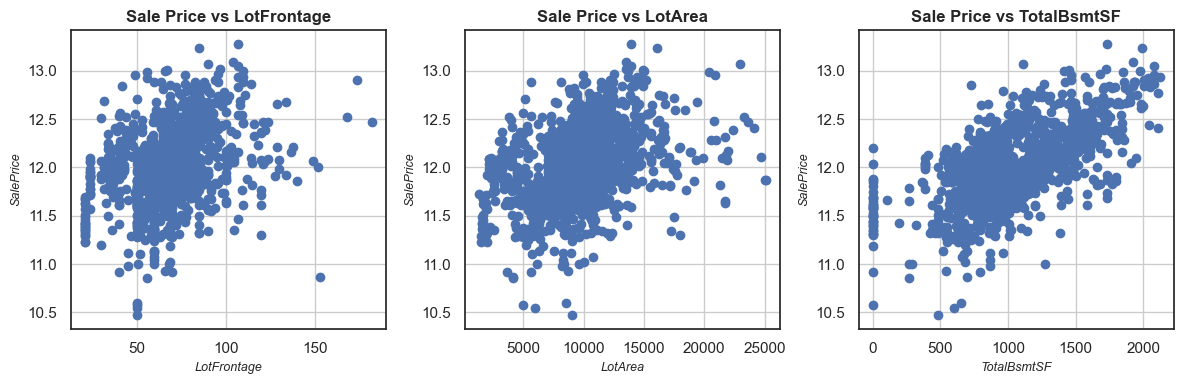

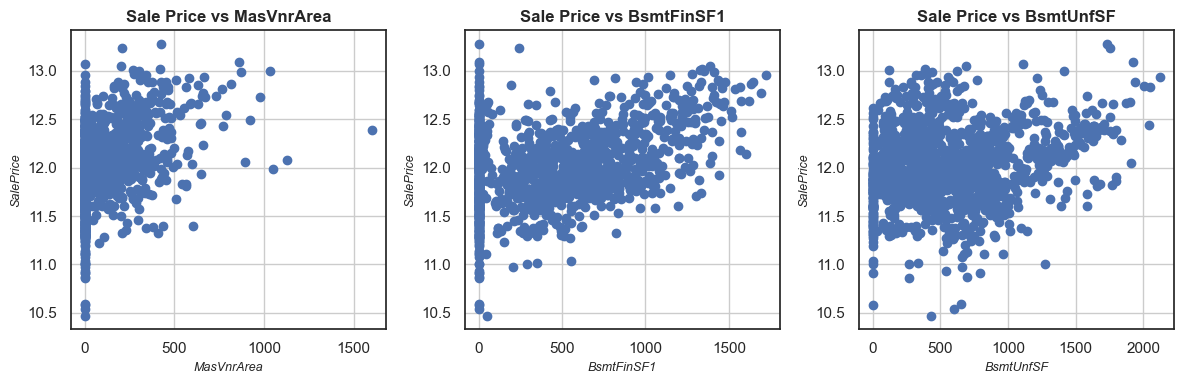

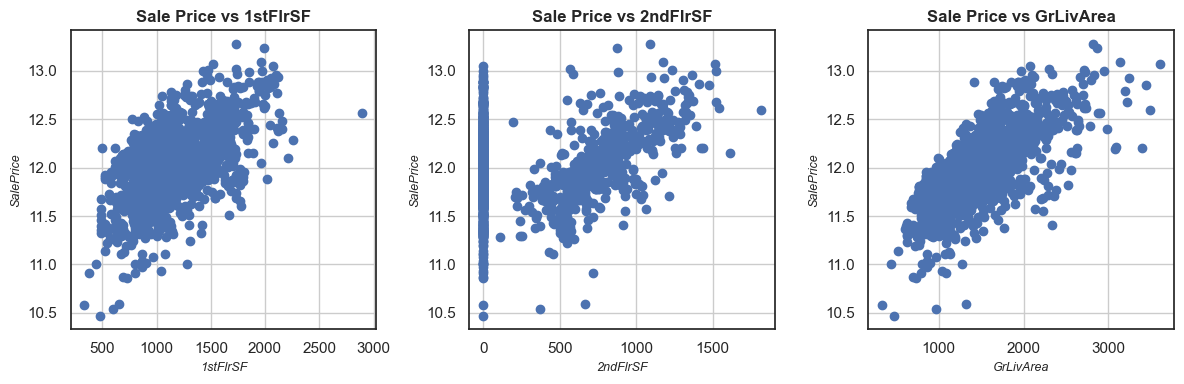

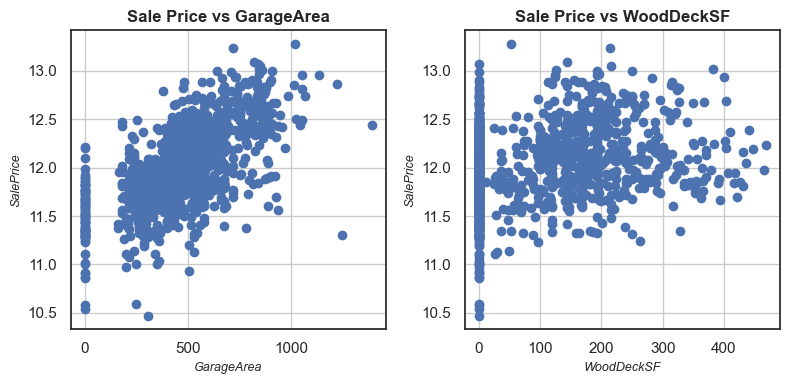

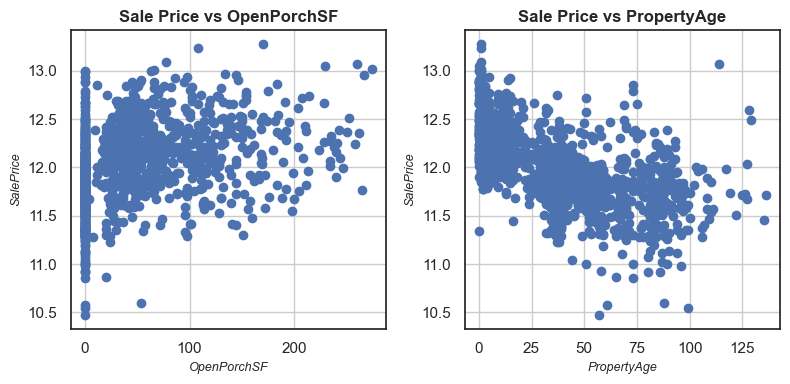

In [41]:
def scatter_plot(variables):
    sns.set_style("white")
    num_vars = len(variables)
    cols = 3  # Maximum number of columns
    rows = num_vars // cols + (num_vars % cols > 0)  # Calculate the required number of rows
    plt.figure(figsize=(4 * cols, 4 * rows))  # Adjust the figure size based on the number of plots
    
    for i, var in enumerate(variables, 1):
        plt.subplot(rows, cols, i)
        plt.scatter(x=housing_df[var], y=housing_df['SalePrice'])
        plt.title(f"Sale Price vs {var}", fontweight='bold', fontsize=12)
        plt.xlabel(var, fontsize=9, fontstyle='italic')
        plt.ylabel('SalePrice', fontsize=9, fontstyle='italic')
        plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()

# Example usage:
scatter_plot(['LotFrontage', 'LotArea', 'TotalBsmtSF'])
scatter_plot(['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF'])
scatter_plot(['1stFlrSF', '2ndFlrSF', 'GrLivArea'])
scatter_plot(['GarageArea', 'WoodDeckSF'])
scatter_plot(['OpenPorchSF', 'PropertyAge'])

**Observations**

1. The variables `'1stFlrSF'` and `'GrLivArea'` demonstrate a direct and positive relationship with SalePrice.
2. The scatter is more pronounced in the remaining continuous variables, warranting a deeper examination.
3. The scatterplots of SalePrice against `'LotFrontage'`, `'MasVnrArea'`, `'1stFlrSF'`, and `'GarageArea'` reveal the presence of certain data points that are outliers or possess unusual values, which should be addressed prior to further analysis.

#### 5.2.1 Handling Outliers

In [42]:
housing_df = housing_df.loc[~((housing_df['SalePrice']<11.0) & (housing_df['LotFrontage']>150))]
housing_df = housing_df.loc[~((housing_df['SalePrice']>12.0) & (housing_df['MasVnrArea']>1500))]
housing_df = housing_df.loc[~((housing_df['SalePrice']>12.0) & (housing_df['1stFlrSF']>2500))]
housing_df = housing_df.loc[~((housing_df['SalePrice']<12.5) & (housing_df['GarageArea']>1200))]

In [43]:
## Determine the percentage of data retained in the dataset

print(round(100*(len(housing_df)/total_records),2),"%")

94.59 %


### 5.3 Correlation between numeric features

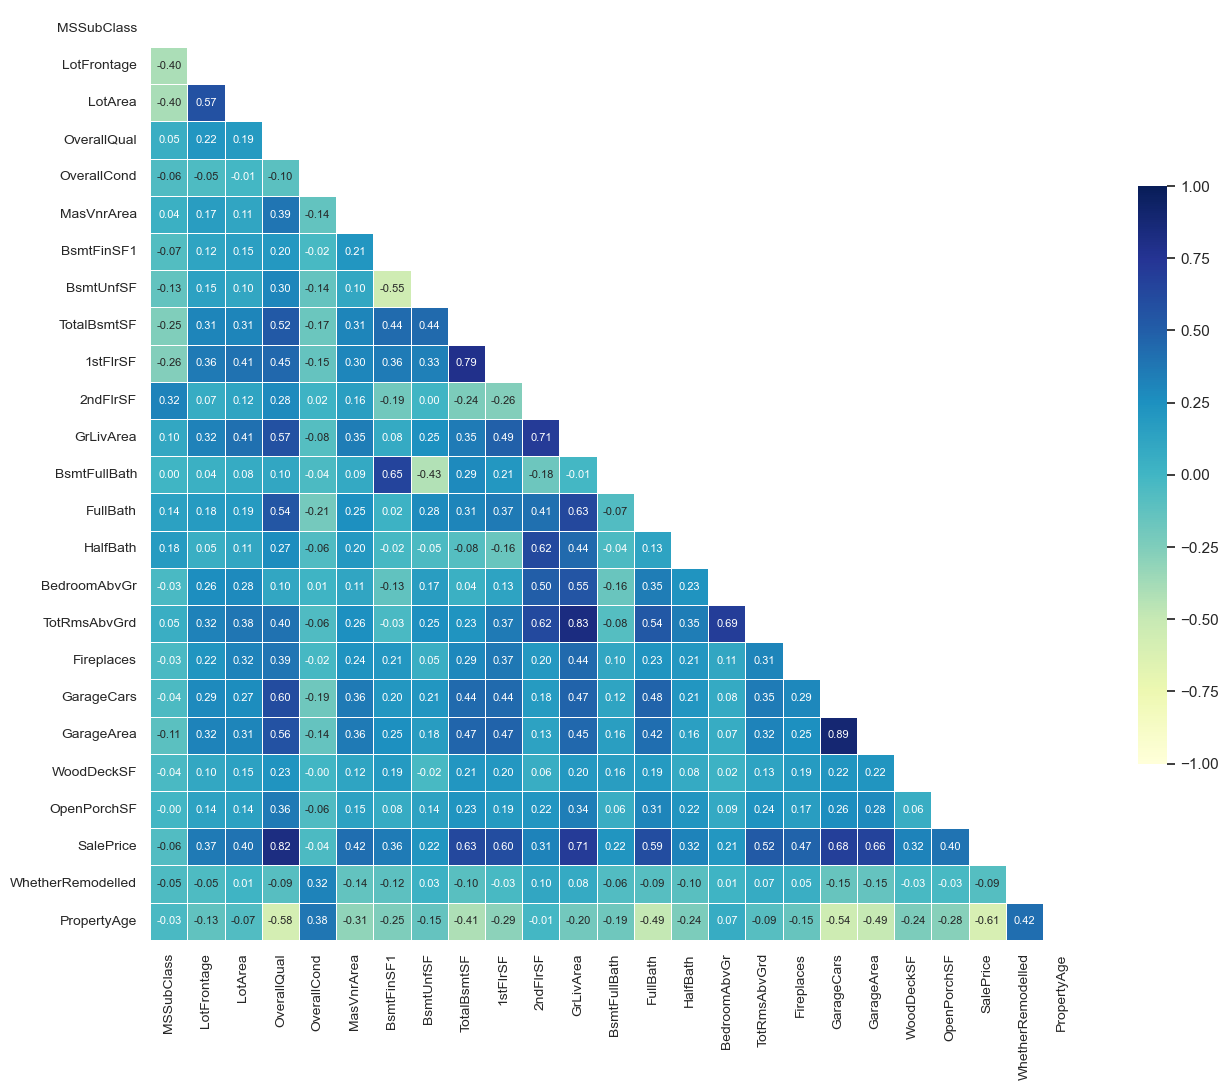

In [44]:
# Select numeric variables and calculate the correlation matrix
numeric_vars = housing_df.select_dtypes(include=['number']).columns
corr_matrix_new = housing_df[numeric_vars].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_new, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix_new, mask=mask, cmap='YlGnBu', cbar_kws={"shrink": .5}, vmin=-1, vmax=1, center=0,
            square=True, annot=True, fmt='.2f', linewidths=.5, annot_kws={"size": 8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Observations:**

1. A robust positive correlation of **0.83** is observed between `'GrLivArea'` and `'TotRmsAbvGrd'`, leading to the exclusion of `'TotRmsAbvGrd'`.
2. A similarly strong correlation of **0.89** between `'GarageCars'` and `'GarageArea'` necessitates the removal of `'GarageCars'`.
3. The correlation of **0.71** between `'GrLivArea'` and `'2ndFlrSF'` is significant, prompting the removal of `'2ndFlrSF'`.
4. Lastly, the **0.77** correlation between `'1stFlrSF'` and `'TotalBsmtSF'` justifies the elimination of `'1stFlrSF'`.

#### 5.3.1 Removing highly correlated columns

In [45]:
# Columns to be removed due to high correlation
columns_to_remove = ['TotRmsAbvGrd', 'GarageCars', '2ndFlrSF', '1stFlrSF']

# Drop the columns and display the first few rows of the updated DataFrame
housing_df = housing_df.drop(columns=columns_to_remove)
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure  \
0    BrkFace       196.0        Gd      PConc       Gd           No   
1       None         0.0        TA     CBlock       Gd           Gd   
2    BrkFace       162.0        Gd      PConc       Gd           Mn   
3       None         0.0        TA     BrkTil       TA           No   
4    BrkFace       350.0        Gd      PConc       Gd           Av   

  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  GrLivArea  \
0          GLQ         706        150          856        Ex       1710   
1          ALQ         978        284         1262        Ex       1262   
2          GLQ         486        434          920        Ex       1786   
3          ALQ         216        540          756        Gd       1717   
4          GLQ         655        490         1145        Ex       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  Fireplaces  \
0             1         2         1             3          Gd           0   
1             0         2         0             3          TA           1   
2             1         2         1             3          Gd           1   
3             1         1         0             3          Gd           1   
4             1         2         1             4          Gd           1   

  FireplaceQu GarageType GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  \
0        None     Attchd          RFn         548           0           61   
1          TA     Attchd          RFn         460         298            0   
2          TA     Attchd          RFn         608           0           42   
3          Gd     Detchd          Unf         642           0           35   
4          TA     Attchd          RFn         836         192           84   

   SalePrice  WhetherRemodelled  PropertyAge  
0  12.247699                  0            5  
1  12.109016                  0           31  
2  12.317171                  1            7  
3  11.849405                  1           91  
4  12.429220                  0            8

#### 5.3.2 Re-evaluating the correlation

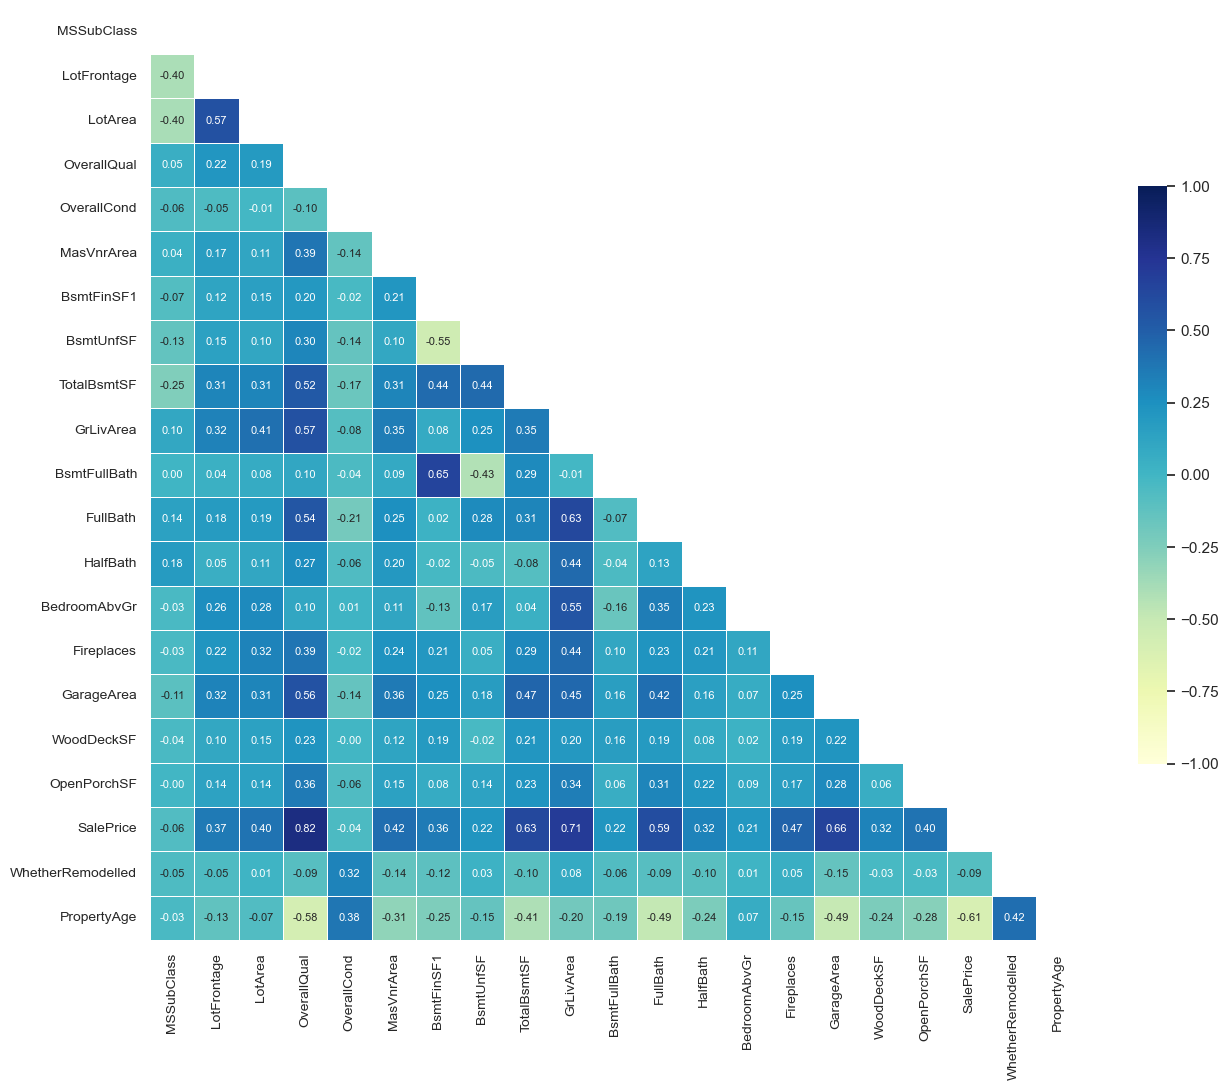

In [46]:
# Select numeric variables and calculate the correlation matrix
numeric_vars = housing_df.select_dtypes(include=['number']).columns
corr_matrix_new = housing_df[numeric_vars].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_new, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix_new, mask=mask, cmap='YlGnBu', cbar_kws={"shrink": .5}, vmin=-1, vmax=1, center=0,
            square=True, annot=True, fmt='.2f', linewidths=.5, annot_kws={"size": 8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [47]:
#Housing Dataframe Shape Check
housing_df.shape

(1381, 40)

## 6. Data Preparation

### 6.1 Convert the categorical to numerical

In [48]:
# Assigning sequential values to ordered fields

# Ordered field values are assigned a sequence, while unordered fields are categorized as 0 or 1.

# Dictionary of ordinal mappings
ordinal_mappings = {
    'd_LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0},
    'd_ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'd_BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'd_BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
    'd_BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'd_HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'd_KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'd_FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'd_GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
}

# Apply the mappings and drop the original columns
for new_col, mapping in ordinal_mappings.items():
    original_col = new_col[2:]  # Remove the 'd_' prefix to get the original column name
    housing_df[new_col] = housing_df[original_col].map(mapping)
    housing_df.drop(original_col, axis=1, inplace=True)

housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotConfig Neighborhood  \
0          60       RL         65.0     8450    Inside      CollgCr   
1          20       RL         80.0     9600       FR2      Veenker   
2          60       RL         68.0    11250    Inside      CollgCr   
3          70       RL         60.0     9550    Corner      Crawfor   
4          60       RL         84.0    14260       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea Foundation  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0    BrkFace       196.0      PConc         706        150          856   
1       None         0.0     CBlock         978        284         1262   
2    BrkFace       162.0      PConc         486        434          920   
3       None         0.0     BrkTil         216        540          756   
4    BrkFace       350.0      PConc         655        490         1145   

   GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  Fireplaces  \
0       1710             1         2         1             3           0   
1       1262             0         2         0             3           1   
2       1786             1         2         1             3           1   
3       1717             1         1         0             3           1   
4       2198             1         2         1             4           1   

  GarageType  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  \
0     Attchd         548           0           61  12.247699   
1     Attchd         460         298            0  12.109016   
2     Attchd         608           0           42  12.317171   
3     Detchd         642           0           35  11.849405   
4     Attchd         836         192           84  12.429220   

   WhetherRemodelled  PropertyAge  d_LotShape  d_ExterQual  d_BsmtQual  \
0                  0            5           3            4           4   
1                  0           31           3            3           4   
2                  1            7           2            4           4   
3                  1           91           2            3           3   
4                  0            8           2            4           4   

   d_BsmtExposure  d_BsmtFinType1  d_HeatingQC  d_KitchenQual  d_FireplaceQu  \
0               1               6            5              4              0   
1               4               5            5              3              3   
2               2               6            5              4              3   
3               1               5            4              4              4   
4               3               6            5              4              3   

   d_GarageFinish  
0               2  
1               2  
2               2  
3               1  
4               2

### 6.2 Create Dummies

In [49]:
#Create dummies for nominal variables
def create_dummies(df, column_names):
    for column_name in column_names:
        dummies = pd.get_dummies(df[column_name], prefix=column_name, drop_first=True)
        df = pd.concat([df, dummies], axis=1)
    return df

# List of nominal variables
nominal_vars = ['MSSubClass', 'LotConfig', 'MSZoning', 'Neighborhood', 'Exterior2nd', 'HouseStyle', 'Foundation', 'MasVnrType', 'RoofStyle', 'Exterior1st', 'GarageType']

# Create dummies and drop original columns
housing_df = create_dummies(housing_df, nominal_vars)
housing_df.drop(columns=nominal_vars, inplace=True)

housing_df.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        150          856       1710             1         2         1   
1        284         1262       1262             0         2         0   
2        434          920       1786             1         2         1   
3        540          756       1717             1         1         0   
4        490         1145       2198             1         2         1   

   BedroomAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  \
0             3           0         548           0           61  12.247699   
1             3           1         460         298            0  12.109016   
2             3           1         608           0           42  12.317171   
3             3           1         642           0           35  11.849405   
4             4           1         836         192           84  12.429220   

   WhetherRemodelled  PropertyAge  d_LotShape  d_ExterQual  d_BsmtQual  \
0                  0            5           3            4           4   
1                  0           31           3            3           4   
2                  1            7           2            4           4   
3                  1           91           2            3           3   
4                  0            8           2            4           4   

   d_BsmtExposure  d_BsmtFinType1  d_HeatingQC  d_KitchenQual  d_FireplaceQu  \
0               1               6            5              4              0   
1               4               5            5              3              3   
2               2               6            5              4              3   
3               1               5            4              4              4   
4               3               6            5              4              3   

   d_GarageFinish  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0               2              0              0              0              0   
1               2              0              0              0              0   
2               2              0              0              0              0   
3               1              0              0              0              0   
4               2              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0               0                  0              0              0   
1               0                  0              1              0   
2               0                  0              0              0   
3               0                  0 

### 6.3 Drop the independent predictors highly correlated to each other

In [50]:
df_corr = housing_df.drop(['SalePrice'],axis =1)

# Calculate the absolute correlation matrix and identify the upper triangle
corr_matrix = df_corr.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find columns with correlation greater than 0.7
highly_correlated_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.7)]

# Display the columns to be dropped
print(highly_correlated_cols)

# Drop the independent predictors highly correlated to each other
housing_df = housing_df.drop(highly_correlated_cols, axis=1)

['d_ExterQual', 'd_BsmtFinType1', 'd_KitchenQual', 'd_FireplaceQu', 'MSZoning_RM', 'Neighborhood_Somerst', 'HouseStyle_1.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Foundation_PConc', 'MasVnrType_None', 'RoofStyle_Hip', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'GarageType_Detchd']


### 6.4 Recheck the dataset

In [51]:
#Recheck the dataset 
housing_df.shape

(1381, 108)

In [52]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 0 to 1458
Columns: 108 entries, LotFrontage to GarageType_None
dtypes: float64(3), int64(22), uint8(83)
memory usage: 392.5 KB


**Observation:**

All the columns are converted to numeric

In [53]:
##Creating a copy of this dataframe for 'Question 3'
df_new1 = housing_df.copy()

In [54]:
def find_binary_columns(df):
    # Identify columns where the number of unique values is exactly 2
    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    return binary_columns

# Get the list of binary columns
binary_columns = find_binary_columns(housing_df)
print(binary_columns)

['WhetherRemodelled', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Ext

## 7. Train Test Split

In [55]:
# Set the random seed for reproducibility
np.random.seed(0)

# Split the data into training and testing sets
df_train, df_test = train_test_split(housing_df, train_size=0.7, test_size=0.3, random_state=100)

In [56]:
# Extract binary columns from the training and testing sets
df_binary_train = df_train[binary_columns]
df_binary_test = df_test[binary_columns]

# Remove binary columns from the training and testing sets to scale the remaining features
df_train = df_train.drop(columns=binary_columns)
df_test = df_test.drop(columns=binary_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing sets
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

# Convert the scaled arrays back into DataFrames
df_train = pd.DataFrame(df_train_scaled, columns=df_train.columns, index=df_train.index)
df_test = pd.DataFrame(df_test_scaled, columns=df_test.columns, index=df_test.index)

# Concatenate the binary columns back to the scaled DataFrames
df_train = pd.concat([df_train, df_binary_train], axis=1)
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [57]:
print(df_train.shape)
print(df_test.shape)

(966, 108)
(415, 108)


In [58]:
# Assigning the target variable 'SalePrice' to y_train and y_test
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [59]:
# The remaining columns in df_train and df_test are the feature variables
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

## 8. Recursive Feature Elimination

Given the presence of approximately 108 features, we’ll employ Recursive Feature Elimination (RFE) to identify the top 50 features for subsequent analysis.

In [60]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Initialize RFE with the linear model as the estimator and specify the number of features to select
feature_selector = RFE(estimator=linear_model, n_features_to_select=50, step=1)

# Fit RFE on the training data
feature_selector = feature_selector.fit(X_train, y_train)

In [61]:
# Create a list of tuples with feature names, support status, and ranking
feature_ranking = list(zip(X_train.columns,feature_selector.support_,feature_selector.ranking_))

# Display the feature ranking list
feature_ranking

[('LotFrontage', False, 8),
 ('LotArea', False, 11),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 49),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 41),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 23),
 ('FullBath', False, 40),
 ('HalfBath', False, 36),
 ('BedroomAbvGr', False, 44),
 ('Fireplaces', False, 27),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 24),
 ('OpenPorchSF', False, 48),
 ('PropertyAge', True, 1),
 ('d_LotShape', False, 51),
 ('d_BsmtQual', False, 18),
 ('d_BsmtExposure', False, 31),
 ('d_HeatingQC', False, 28),
 ('d_GarageFinish', False, 53),
 ('WhetherRemodelled', False, 52),
 ('MSSubClass_30', False, 4),
 ('MSSubClass_40', False, 47),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 30),
 ('MSSubClass_60', False, 54),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 34),
 ('MSSubClass_85', False, 38),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False

In [62]:
# Identify and list columns selected by RFE
selected_columns = X_train.columns[feature_selector.support_]

# Display the list of selected columns
selected_columns

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea', 'PropertyAge', 'MSSubClass_45', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_160', 'LotConfig_CulDSac',
       'MSZoning_FV', 'MSZoning_RL', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
       'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Foundation_Stone',
       'Foundation_Wood', 'Roo

In [63]:
##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

selected_50features_df = pd.DataFrame(feature_ranking, columns=['Features', 'rfe_support', 'rfe_ranking'])
selected_50features_df = selected_50features_df.loc[selected_50features_df['rfe_support'] == True]
selected_50features_df.reset_index(drop=True, inplace=True)
selected_50features_df

Features  rfe_support  rfe_ranking
0            OverallQual         True            1
1            OverallCond         True            1
2             BsmtFinSF1         True            1
3            TotalBsmtSF         True            1
4              GrLivArea         True            1
5             GarageArea         True            1
6            PropertyAge         True            1
7          MSSubClass_45         True            1
8          MSSubClass_70         True            1
9          MSSubClass_75         True            1
10         MSSubClass_90         True            1
11        MSSubClass_160         True            1
12     LotConfig_CulDSac         True            1
13           MSZoning_FV         True            1
14           MSZoning_RL         True            1
15   Neighborhood_BrDale         True            1
16  Neighborhood_Crawfor         True            1
17  Neighborhood_Edwards         True            1
18   Neighborhood_IDOTRR         True            1
19  Neighborhood_MeadowV         True            1
20  Neighborhood_Mitchel         True            1
21    Neighborhood_NAmes         True            1
22  Neighborhood_NPkVill         True            1
23   Neighborhood_NWAmes         True            1
24  Neighborhood_NridgHt         True            1
25  Neighborhood_OldTown         True            1
26   Neighborhood_Sawyer         True            1
27  Neighborhood_StoneBr         True            1
28   Exterior2nd_AsphShn         True            1
29   Exterior2nd_Brk Cmn         True            1
30   Exterior2nd_BrkFace         True            1
31   Exterior2nd_CmentBd         True            1
32   Exterior2nd_HdBoard         True            1
33   Exterior2nd_ImStucc         True            1
34   Exterior2nd_MetalSd         True            1
35   Exterior2nd_Plywood         True            1
36     Exterior2nd_Stone         True            1
37    Exterior2nd_Stucco         True            1
38   Exterior2nd_VinylSd         True            1
39   Exterior2nd_Wd Sdng         True            1
40     HouseStyle_2.5Fin         True            1
41     HouseStyle_2.5Unf         True            1
42      Foundation_Stone         True            1
43       Foundation_Wood         True            1
44     RoofStyle_Gambrel         True            1
45   Exterior1st_BrkComm         True            1
46   Exterior1st_BrkFace         True            1
47   Exterior1st_WdShing         True            1
48    GarageType_Basment         True            1
49       GarageType_None         True            1

In [64]:
#Assign top 50 columns to X_train_rfe

X_train_rfe = X_train[selected_columns]

In [65]:
# Ensuring that X_train and X_test have only the top 50 RFE supported features

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## 9. Model Building and Evaluation

### 9.1 Ridge Regression

In [66]:
# Define the range of alpha values for Ridge Regression
alpha_values = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]

# Initialize the Ridge estimator
ridge_estimator = Ridge()

# Set up cross-validation configuration
cross_val_folds = KFold(n_splits=5)

# Configure GridSearchCV with the Ridge estimator and alpha values
ridge_grid_search = GridSearchCV(estimator=ridge_estimator,
                                 param_grid={'alpha': alpha_values},
                                 scoring='neg_mean_absolute_error',
                                 cv=cross_val_folds,
                                 return_train_score=True,
                                 verbose=1)

# Perform the grid search with cross-validation
ridge_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
##Display Mean Scores

ridge_scores  = pd.DataFrame(ridge_grid_search.cv_results_)
ridge_scores[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
19         8.0         -0.210048        -0.221605                1
20         9.0         -0.210438        -0.221618                2
18         7.0         -0.209694        -0.221651                3
21        10.0         -0.210843        -0.221668                4
17         6.0         -0.209364        -0.221756                5
22          11         -0.211257        -0.221771                6
23          12         -0.211672        -0.221893                7
16         5.0         -0.209054        -0.221951                8
24          13         -0.212088        -0.222058                9
25          14         -0.212509        -0.222276               10
15         4.0         -0.208787        -0.222286               11
26          15         -0.212934        -0.222512               12
14         3.0         -0.208553        -0.222677               13
27          16         -0.213356        -0.222756               14
28          17         -0.213775        -0.223011               15
29          18         -0.214187        -0.223284               16
13         2.0         -0.208301        -0.223370               17
30          19         -0.214592        -0.223573               18
31          20         -0.214986        -0.223858               19
12         1.0         -0.207955        -0.224414               20
11         0.9         -0.207898        -0.224574               21
10         0.8         -0.207833        -0.224740               22
9          0.7         -0.207759        -0.224913               23
8          0.6         -0.207676        -0.225105               24
7          0.5         -0.207590        -0.225322               25
6          0.4         -0.207499        -0.225570               26
5          0.3         -0.207394        -0.225826               27
4          0.2         -0.207256        -0.226149               28
3          0.1         -0.207088        -0.226548               29
2         0.01         -0.206984        -0.227116               30
1        0.001         -0.206974        -0.227185               31
0       0.0001         -0.206973        -0.227192               32
32          50         -0.223374        -0.230496               33
33         100         -0.231097        -0.236599               34
34         500         -0.274400        -0.276676               35
35        1000         -0.331544        -0.333312               36

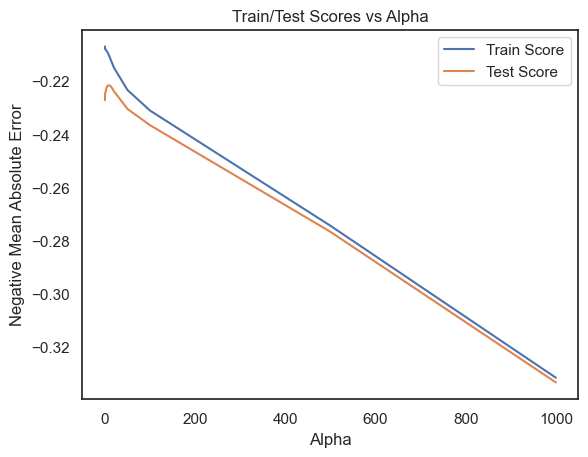

In [68]:
# Convert alpha parameter values to integers for plotting
ridge_scores['alpha_int'] = ridge_scores['param_alpha'].apply(int)

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Plot the train and test scores
ax.plot(ridge_scores['alpha_int'], ridge_scores['mean_train_score'], label='Train Score')
ax.plot(ridge_scores['alpha_int'], ridge_scores['mean_test_score'], label='Test Score')

# Label the axes and title the plot
ax.set_xlabel('Alpha')
ax.set_ylabel('Negative Mean Absolute Error')
ax.set_title('Train/Test Scores vs Alpha')

# Display the legend and show the plot
ax.legend(loc='best')
plt.show()

In [69]:
##Finding the best estimator for alpha (lambda parameter)
ridge_grid_search.best_estimator_

Ridge(alpha=8.0)

In [70]:
# Set alpha to 8 and initialize Ridge Regression
alpha_value = 8
ridge_regressor = Ridge(alpha=alpha_value)

# Fit the model to the training data
ridge_regressor.fit(X_train, y_train)

# Output the intercept and coefficients
intercept = ridge_regressor.intercept_
coefficients = ridge_regressor.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients:\n{coefficients}")

Intercept: -0.14279634059307456
Coefficients:
[ 0.22811418  0.15817642  0.10680401  0.14375568  0.36228716  0.10366948
 -0.28671345  0.0424148   0.17726922  0.0177001  -0.16492446 -0.23794446
  0.09267265  0.2507963   0.1733638  -0.08916825  0.17653754 -0.06475937
 -0.13721268 -0.16468068 -0.12735844 -0.09626932  0.00587146 -0.09345794
  0.14509487 -0.11712751 -0.08589522  0.16852743  0.02925293 -0.0735141
  0.08174668  0.04774744 -0.0142989  -0.02273986  0.04678954 -0.0030133
  0.09018745  0.06898265  0.05626053  0.0769415  -0.05026162 -0.04175746
  0.07324564 -0.08673259  0.07512959 -0.13353797  0.14108911  0.04524149
 -0.08258248 -0.1168248 ]


#### 9.1.1 Model Prediction and Evaluation Metrics

In [71]:
# Define a function to make predictions and evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_typ, alpha):
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        #R2 score for Ridge Regression Model
        'R2 Train': r2_score(y_train, y_train_pred),
        'R2 Test': r2_score(y_test, y_test_pred),

        #Check the mean squared error (MSE) for Ridge Regression Model
        'MSE Train': mean_squared_error(y_train, y_train_pred),
        'MSE Test': mean_squared_error(y_test, y_test_pred),

        #Mean Absolute error for train and test sets
        'MAE Train': mean_absolute_error(y_train, y_train_pred),
        'MAE Test': mean_absolute_error(y_test, y_test_pred),

        #Root Mean Squared Error for Train and Test Sets
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    
    # Print the metrics
    print("For "+model_typ+f" Regression Model (Original Model, alpha={alpha}):\n{'*'*40}")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    print(f"{'*'*40}")

evaluate_model(ridge_regressor, X_train, X_test, y_train, y_test,'Ridge',8.0)

# Predictions
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

For Ridge Regression Model (Original Model, alpha=8.0):
****************************************
R2 Train: 0.9141662215779705
R2 Test: 0.8911232017492551
MSE Train: 0.08583377842202958
MSE Test: 0.1055488837696518
MAE Train: 0.21040903665829555
MAE Test: 0.21666630472566778
RMSE Train: 0.29297402345946916
RMSE Test: 0.32488287700285434
****************************************


In [72]:
# Construct a DataFrame with features and their corresponding Ridge coefficients
features_ridge = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': np.round(ridge_regressor.coef_, 4),
    'Absolute Coefficient': np.abs(np.round(ridge_regressor.coef_, 4))
}).sort_values('Absolute Coefficient', ascending=False).reset_index(drop=True)

# Display the top 10 features with the highest absolute coefficients
features_ridge.head(10)

Feature  Coefficient  Absolute Coefficient
0             GrLivArea       0.3623                0.3623
1           PropertyAge      -0.2867                0.2867
2           MSZoning_FV       0.2508                0.2508
3        MSSubClass_160      -0.2379                0.2379
4           OverallQual       0.2281                0.2281
5         MSSubClass_70       0.1773                0.1773
6  Neighborhood_Crawfor       0.1765                0.1765
7           MSZoning_RL       0.1734                0.1734
8  Neighborhood_StoneBr       0.1685                0.1685
9         MSSubClass_90      -0.1649                0.1649

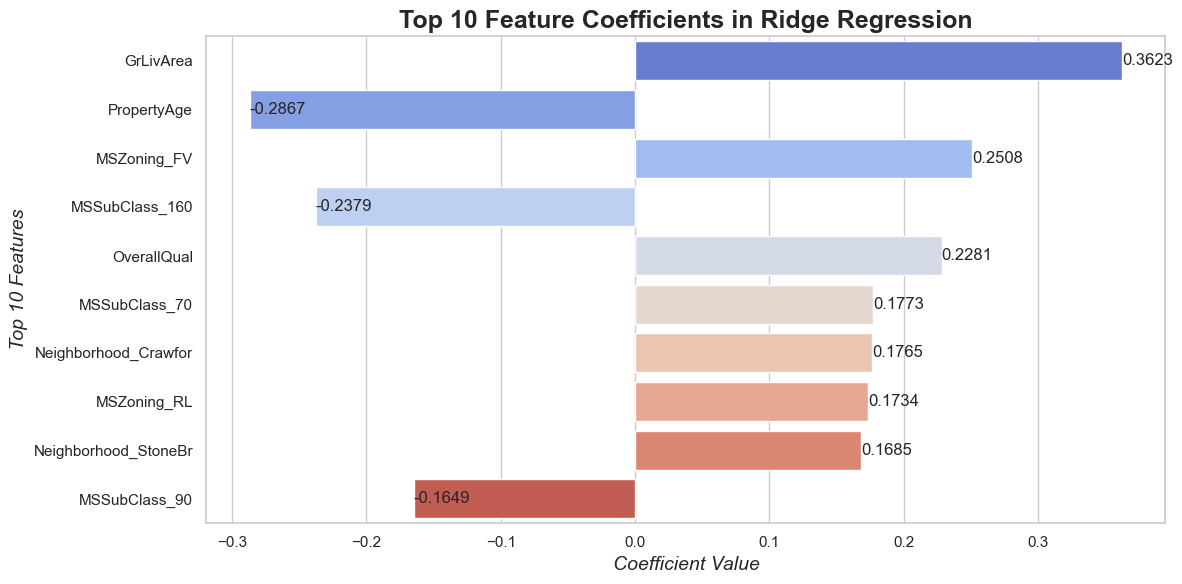

In [73]:
# Extracting the top 10 features for Ridge Regression
top_features = features_ridge.head(10)

# Setting up the style for the plot
sns.set_style('whitegrid')

# Creating the plot with specified figure size
plt.figure(figsize=(12, 6))

# Creating a barplot for the top 10 features
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')

# Adding labels and title to the plot
plt.xlabel('Coefficient Value', fontsize=14, fontstyle='italic')
plt.ylabel('Top 10 Features', fontsize=14, fontstyle='italic')
plt.title('Top 10 Feature Coefficients in Ridge Regression', fontsize=18, fontweight='bold')

# Looping through the coefficients to add text labels
for i, (value, feature) in enumerate(zip(top_features['Coefficient'], top_features['Feature'])):
    plt.text(value, i, f'{value:.4f}', va='center', fontsize=12)

# Finalizing the plot layout and displaying it
plt.tight_layout()
plt.show()

**Observation:**

The aforementioned graph illustrates the ten most influential variables identified by the Ridge Regression analysis, which play a crucial role in determining the house’s selling price.

#### 9.1.2 Residual Analysis of Model

##### 9.1.2.1 Train Set

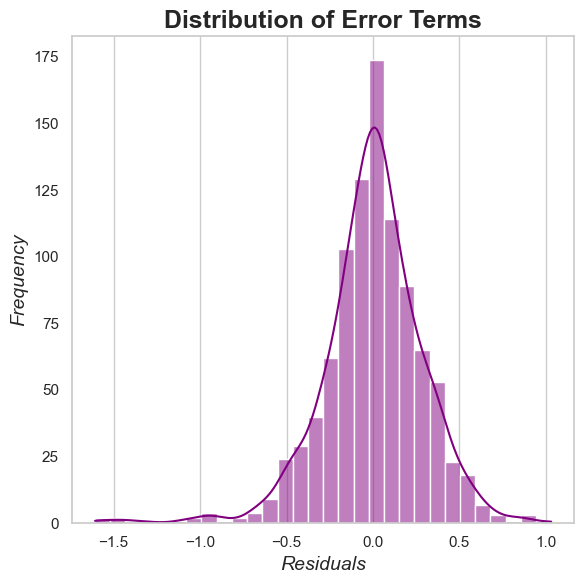

In [74]:
# Calculate residuals
residuals = y_train - y_train_pred

# Create a histogram to visualize the distribution of residuals
plt.figure(figsize=(6, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Error Terms', fontsize=18, fontweight='bold')
plt.xlabel('Residuals', fontsize=14, fontstyle='italic')
plt.ylabel('Frequency', fontsize=14, fontstyle='italic')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Observation:**

The distribution of error terms appears to be roughly normal with a mean around zero, confirming our linear regression assumption.

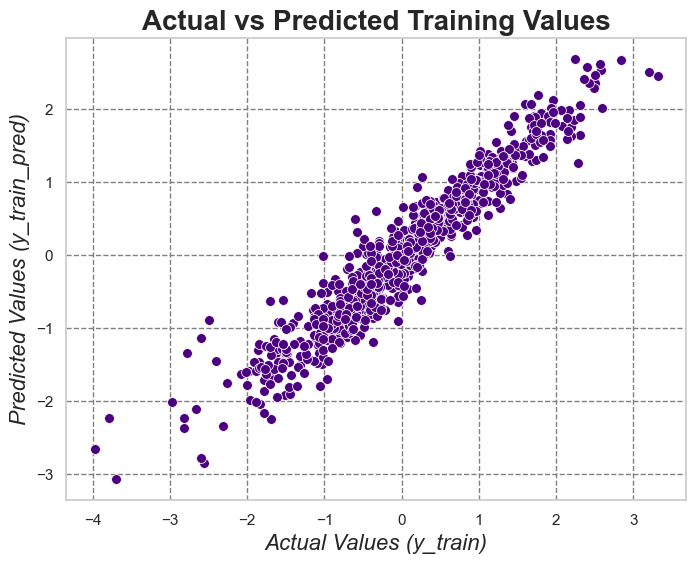

In [75]:
# Visualizing the relationship between actual and predicted training values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_train_pred, color='indigo', edgecolor='w', s=50)
plt.title('Actual vs Predicted Training Values', fontsize=20, fontweight='bold')
plt.xlabel('Actual Values (y_train)', fontsize=16, fontstyle='italic')
plt.ylabel('Predicted Values (y_train_pred)', fontsize=16, fontstyle='italic')
plt.grid(True, which='major', color='grey', linestyle='--')
plt.show()

In [76]:
y_train.shape

(966,)

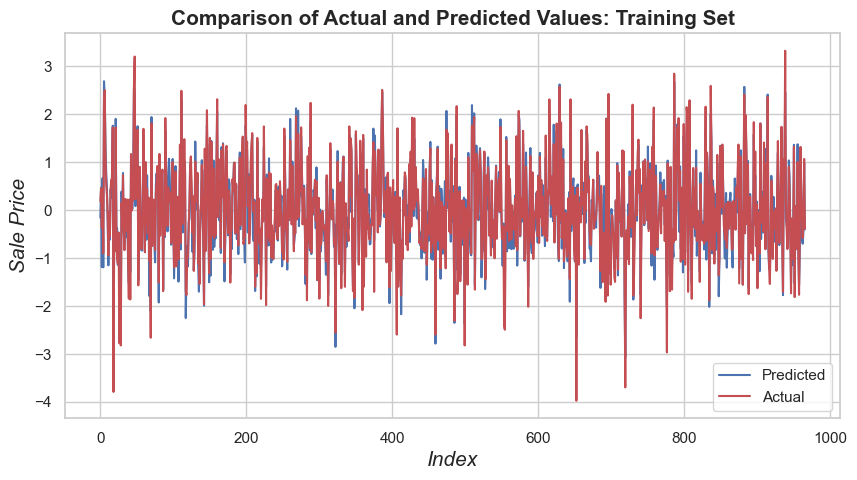

In [77]:
# Setting up the plot for actual vs predicted values in the training set
plt.figure(figsize=(10, 5))
index_range = range(len(y_train))  # Assuming y_train is a pandas Series or numpy array
plt.plot(index_range, y_train_pred, 'b-', label='Predicted')  # Predicted values plot
plt.plot(index_range, y_train, 'r-', label='Actual')  # Actual values plot
plt.title('Comparison of Actual and Predicted Values: Training Set', fontsize=15, fontweight='bold')
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.ylabel('Sale Price', fontsize=15, fontstyle='italic')
plt.legend()
plt.show()

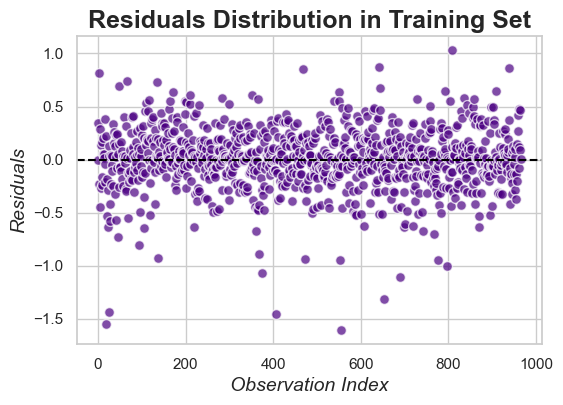

In [78]:
res_train = (y_train-y_train_pred)

# Visualizing error terms for the training set
plt.figure(figsize=(6, 4))
index_values = range(len(res_train))  # Assuming res_train is the residuals array
plt.scatter(index_values, res_train, alpha=0.7, edgecolor='w', s=50, color='indigo')

plt.title('Residuals Distribution in Training Set', fontsize=18, fontweight='bold')
plt.xlabel('Observation Index', fontsize=14, fontstyle='italic')
plt.ylabel('Residuals', fontsize=14, fontstyle='italic')
plt.axhline(y=0, color='black', linestyle='--')  # Adding a horizontal line at zero
plt.grid(True)
plt.show()


**Observation:**

The residuals are distributed around the zero line(y=0) and do not show dependency on one another.

##### 9.1.2.2 Test Set

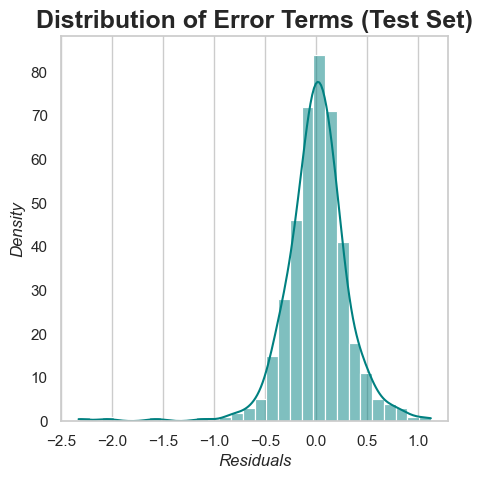

In [79]:
# Visualizing the distribution of error terms for the test set
plt.figure(figsize=(5, 5))
test_residuals = y_test - y_test_pred  # Calculating residuals
sns.histplot(test_residuals, bins=30, kde=True, color='teal')  # Using histplot with KDE
plt.title('Distribution of Error Terms (Test Set)', fontsize=18, fontweight='bold')
plt.xlabel('Residuals', fontsize=12, fontstyle='italic')
plt.ylabel('Density', fontsize=12, fontstyle='italic')
plt.grid(axis='y')  # Adding grid lines along the y-axis
plt.show()

**Observation:**

The distribution of error terms roughly follows a normal distribution centered around zero, which aligns with our initial assumption for the linear regression model.

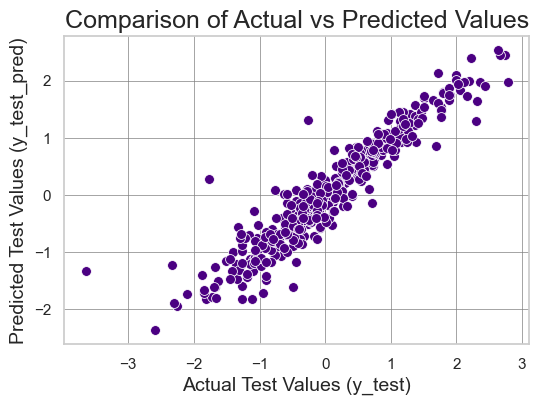

In [80]:
# Set up the matplotlib figure for plotting
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_test_pred, edgecolor='w', s=50, color='indigo')

# Title and labels for the plot
plt.title('Comparison of Actual vs Predicted Values', fontsize=18)
plt.xlabel('Actual Test Values (y_test)', fontsize=14)
plt.ylabel('Predicted Test Values (y_test_pred)', fontsize=14)

# Enabling grid for better readability
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.show()


In [81]:
y_test.shape

(415,)

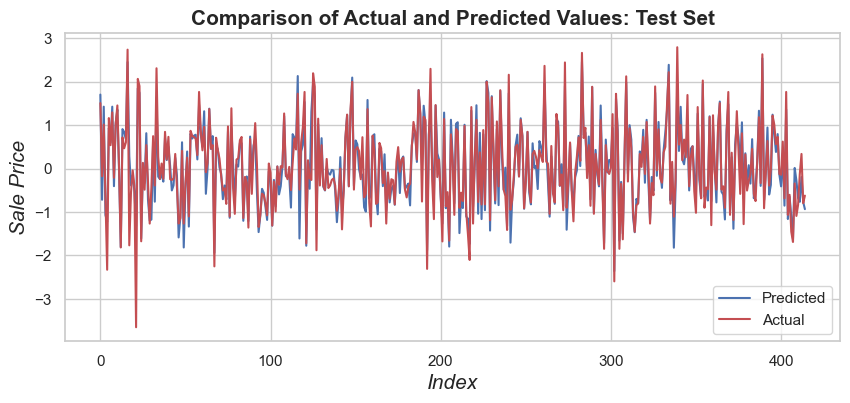

In [82]:
# Plotting Actual vs Predicted values for the Test Set
plt.figure(figsize=(10, 4))
indices = range(415)  # Assuming there are 415 observations in the test set
plt.plot(indices, y_test_pred, 'b-', label='Predicted')  # Predicted values
plt.plot(indices, y_test, 'r-', label='Actual')  # Actual values
plt.title('Comparison of Actual and Predicted Values: Test Set', fontsize=15, fontweight='bold')
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.ylabel('Sale Price', fontsize=15, fontstyle='italic')
plt.legend()
plt.show()

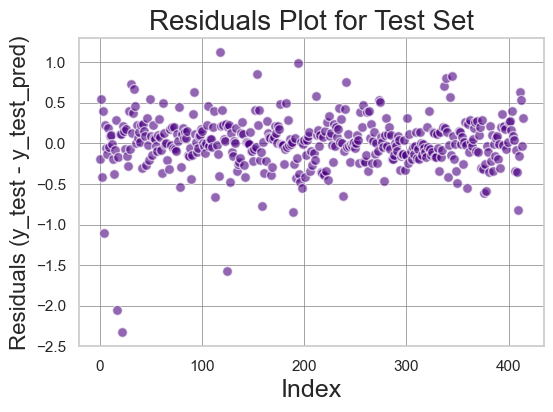

In [83]:
# Set up the plot for error terms in the test set
plt.figure(figsize=(6, 4))
test_indices = range(len(y_test))  # Assuming y_test is a pandas Series or numpy array
test_residuals = y_test - y_test_pred  # Calculating residuals for the test set
plt.scatter(test_indices, test_residuals, color='indigo', edgecolor='w', s=50, alpha=0.6)

# Add titles and labels
plt.title('Residuals Plot for Test Set', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Residuals (y_test - y_test_pred)', fontsize=16)

# Show grid and the plot
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.show()


**Observation:**

The residuals are distributed around the zero line and exhibit no interdependence.

### 9.2 Lasso Regression

In [84]:
# Initialize the Lasso Regression Model
lasso_reg = Lasso()

# Define a range of alphas (lambda parameter) for hyperparameter tuning
alpha_range = [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]

# Set up the hyperparameters grid
hyperparameters = {'alpha': alpha_range}

# Number of folds for cross-validation
num_folds = 5

# Create the GridSearchCV object
lasso_grid_search = GridSearchCV(estimator=lasso_reg,
                                 param_grid=hyperparameters,
                                 scoring='neg_mean_absolute_error',
                                 cv=num_folds,
                                 return_train_score=True,
                                 verbose=1)

# Fit the model to the training data
lasso_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# Convert the cross-validation results into a DataFrame
lasso_cv_results_df = pd.DataFrame(lasso_grid_search.cv_results_)

# Display the sorted results
lasso_cv_results_df[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
9        0.001         -0.210209        -0.223918                1
8       0.0009         -0.209909        -0.224016                2
7       0.0008         -0.209655        -0.224161                3
6       0.0007         -0.209419        -0.224263                4
5       0.0006         -0.209151        -0.224317                5
10       0.002         -0.213306        -0.224366                6
4       0.0005         -0.208900        -0.224573                7
3       0.0003         -0.208427        -0.225085                8
2       0.0002         -0.207882        -0.225590                9
1       0.0001         -0.207238        -0.226455               10
11       0.003         -0.217524        -0.226752               11
0      0.00001         -0.206977        -0.227095               12
12       0.004         -0.221471        -0.230009               13
13       0.005         -0.225425        -0.233228               14
14        0.01         -0.240006        -0.243933               15
15        0.05         -0.253709        -0.256450               16
16         0.1         -0.286503        -0.288615               17
17         0.2         -0.345715        -0.347300               18
18         0.3         -0.421508        -0.423669               19
19         0.4         -0.503736        -0.506022               20
20         0.5         -0.576048        -0.577835               21
21         0.6         -0.636055        -0.637773               22
22         0.7         -0.697506        -0.699013               23
23         0.8         -0.761580        -0.762717               24
37         100         -0.775470        -0.775675               25
36          50         -0.775470        -0.775675               25
35          20         -0.775470        -0.775675               25
34        10.0         -0.775470        -0.775675               25
33         9.0         -0.775470        -0.775675               25
32         8.0         -0.775470        -0.775675               25
31         7.0         -0.775470        -0.775675               25
29         5.0         -0.775470        -0.775675               25
38         500         -0.775470        -0.775675               25
28         4.0         -0.775470        -0.775675               25
27         3.0         -0.775470        -0.775675               25
26         2.0         -0.775470        -0.775675               25
25         1.0         -0.775470        -0.775675               25
24         0.9         -0.775470        -0.775675               25
30         6.0         -0.775470        -0.775675               25
39        1000         -0.775470        -0.775675               25

In [86]:
#Plotting a magnified graph for a lower range of alpha.

# Instantiate the Lasso model
lasso_regressor = Lasso()

# Define a more focused range of alpha values based on previous CV results
alpha_values_1 = [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]

# Set up the parameters dictionary for the grid search
hyper_params = {'alpha': alpha_values_1}

# Specify the number of cross-validation folds
cv_folds = 5

# Create and configure the GridSearchCV object
lasso_grid_search = GridSearchCV(estimator=lasso_regressor, 
                                 param_grid=hyper_params, 
                                 scoring='neg_mean_absolute_error', 
                                 cv=cv_folds, 
                                 return_train_score=True, 
                                 verbose=1)

# Fit the GridSearchCV object to the training data
lasso_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Convert the cross-validation results into a DataFrame
lasso_cv_results_df = pd.DataFrame(lasso_grid_search.cv_results_)

# Display the sorted results
lasso_cv_results_df[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
10       0.001         -0.210209        -0.223918                1
9       0.0009         -0.209909        -0.224016                2
8       0.0008         -0.209655        -0.224161                3
7       0.0007         -0.209419        -0.224263                4
6       0.0006         -0.209151        -0.224317                5
11       0.002         -0.213306        -0.224366                6
5       0.0005         -0.208900        -0.224573                7
4       0.0004         -0.208683        -0.224816                8
3       0.0003         -0.208427        -0.225085                9
2       0.0002         -0.207882        -0.225590               10
1       0.0001         -0.207238        -0.226455               11
12       0.003         -0.217524        -0.226752               12
0      0.00001         -0.206977        -0.227095               13
13       0.005         -0.225425        -0.233228               14
14        0.01         -0.240006        -0.243933               15
15        0.02         -0.243076        -0.245842               16
16        0.05         -0.253709        -0.256450               17

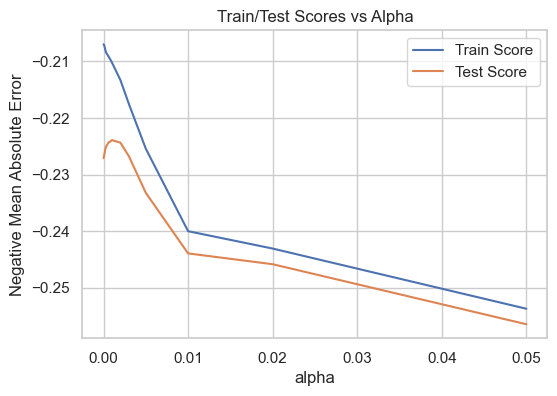

In [88]:
# Convert 'param_alpha' to float for plotting
lasso_cv_results_df['param_alpha'] = lasso_cv_results_df['param_alpha'].astype('float64')

# Set up the plot for mean scores
plt.figure(figsize=(6, 4))
plt.plot(lasso_cv_results_df['param_alpha'], lasso_cv_results_df['mean_train_score'], label='Train Score')
plt.plot(lasso_cv_results_df['param_alpha'], lasso_cv_results_df['mean_test_score'], label='Test Score')

# Labeling the plot
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Train/Test Scores vs Alpha')

# Adding legend and showing the plot
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [89]:
# Extracting the best Lasso estimator after cross-validation
lasso_grid_search.best_estimator_

Lasso(alpha=0.001)

In [90]:
# Setting up the Lasso model with lambda = 0.001
lasso_regressor = Lasso(alpha=0.001)
        
# Fitting the model to the training data
lasso_regressor.fit(X_train, y_train)

# Displaying the intercept and coefficients
print("Intercept: ",lasso_regressor.intercept_)
print("Coefficients:\n ",lasso_regressor.coef_)

Intercept:  -0.12607576285216057
Coefficients:
  [ 0.22562161  0.15995232  0.10487383  0.14147518  0.36496911  0.10209831
 -0.2958012   0.          0.19745142 -0.         -0.18270893 -0.31252446
  0.08811376  0.31416549  0.18034293 -0.          0.21183154 -0.03766555
 -0.1196319  -0.13312394 -0.12955484 -0.08127157  0.         -0.08579786
  0.16243639 -0.09499201 -0.07298262  0.20798766  0.         -0.
  0.          0.         -0.03968562 -0.          0.012907   -0.01978675
  0.          0.01400037  0.01925347  0.0406787  -0.         -0.
  0.         -0.          0.01891555 -0.30591779  0.16465458  0.
 -0.08127922 -0.11444202]


In [91]:
# Predictions for training and testing sets
y_pred_train = lasso_regressor.predict(X_train)
y_pred_test = lasso_regressor.predict(X_test)

evaluate_model(lasso_regressor, X_train, X_test, y_train, y_test, "Lasso",0.001)

For Lasso Regression Model (Original Model, alpha=0.001):
****************************************
R2 Train: 0.9137483642080722
R2 Test: 0.8927812619728864
MSE Train: 0.08625163579192789
MSE Test: 0.10394150360566033
MAE Train: 0.21147969374732178
MAE Test: 0.2152225550413117
RMSE Train: 0.29368628805568686
RMSE Test: 0.3223996023658533
****************************************


In [92]:
# Constructing a DataFrame with features and their corresponding Lasso coefficients
lasso_features_coefficients = pd.DataFrame({
    'Features': X_train.columns,
    'Coefficient': lasso_regressor.coef_.round(4),
    'Abs_Coefficient': abs(lasso_regressor.coef_.round(4))
}).sort_values('Abs_Coefficient', ascending=False).reset_index(drop=True)

# Display the top 10 features with the highest absolute coefficient values
lasso_features_coefficients.head(10)

Features  Coefficient  Abs_Coefficient
0             GrLivArea       0.3650           0.3650
1           MSZoning_FV       0.3142           0.3142
2        MSSubClass_160      -0.3125           0.3125
3   Exterior1st_BrkComm      -0.3059           0.3059
4           PropertyAge      -0.2958           0.2958
5           OverallQual       0.2256           0.2256
6  Neighborhood_Crawfor       0.2118           0.2118
7  Neighborhood_StoneBr       0.2080           0.2080
8         MSSubClass_70       0.1975           0.1975
9         MSSubClass_90      -0.1827           0.1827

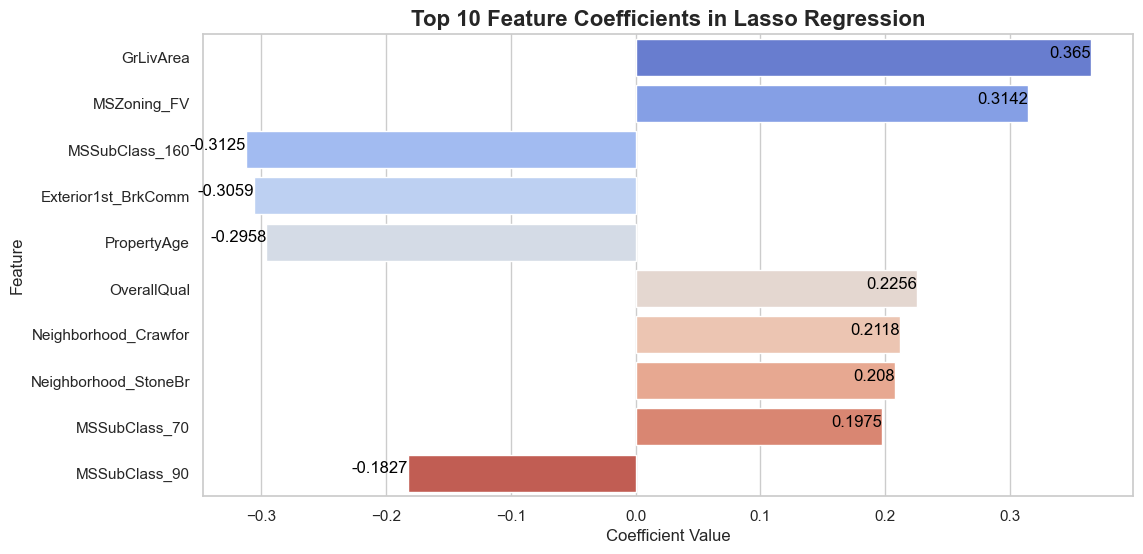

In [93]:
# Extracting the top 10 coefficients for plotting
top_10_coefficients = lasso_features_coefficients.loc[:9]

# Setting the aesthetic style of the plots
sns.set_style('whitegrid')

# Creating the bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Coefficient', y='Features', data=top_10_coefficients, palette='coolwarm')

# Annotating the bar plot with the coefficient values
for index, row in top_10_coefficients.iterrows():
    barplot.text(row.Coefficient, index, round(row.Coefficient, 4), color='black', ha="right")

# Setting the title and labels
plt.title('Top 10 Feature Coefficients in Lasso Regression', fontsize=16, fontweight='bold')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Displaying the plot
plt.show()

In [94]:
# Extracting the top 5 feature names from the Lasso model coefficients which will be used later to answer 'Question 3'
top_five_features = top_10_coefficients['Features'].head(5).tolist()

# Displaying the list of top 5 features
top_five_features

['GrLivArea',
 'MSZoning_FV',
 'MSSubClass_160',
 'Exterior1st_BrkComm',
 'PropertyAge']

#### 9.2.1 Residual Analysis of Model

##### 9.2.1.1 Train Set

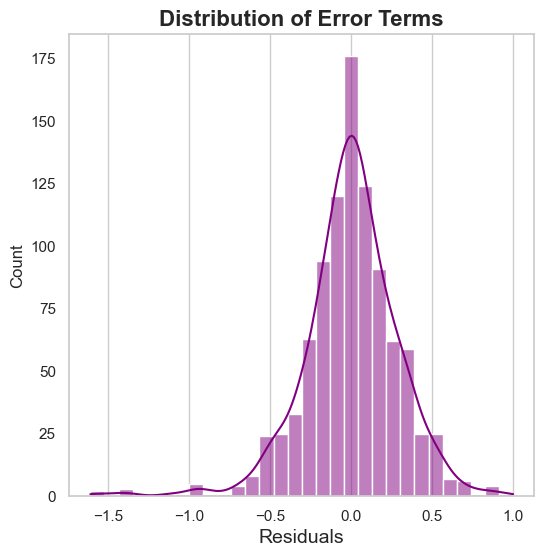

In [95]:
# Calculate the residuals
residuals_l = y_train - y_pred_train

# Plotting the distribution of residuals
plt.figure(figsize=(6, 6))
sns.histplot(residuals_l, bins=30, kde=True, color='purple')

# Customizing the plot's title and labels
plt.title('Distribution of Error Terms', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)

# Enhancing the plot with grid lines and showing the plot
plt.grid(axis='y')
plt.show()

**Observation:**

The distribution of the error terms appears to be roughly normal with a mean around zero, confirming our initial assumption for the linear regression model.

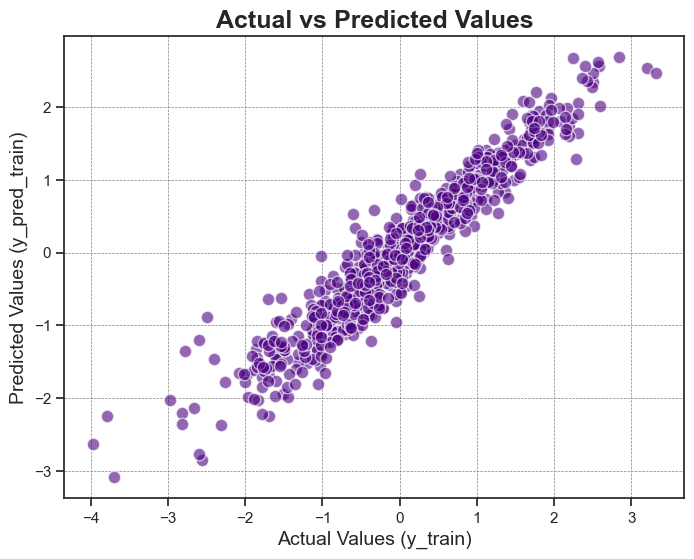

In [96]:
# Setting the visual style of the plot
sns.set(style='ticks')

# Creating the scatter plot to compare actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='indigo', alpha=0.6, edgecolors='w', s=80)

# Adding titles and labels with updated styling
plt.title('Actual vs Predicted Values', fontsize=18, fontweight='bold')
plt.xlabel('Actual Values (y_train)', fontsize=14)
plt.ylabel('Predicted Values (y_pred_train)', fontsize=14)

# Enhancing the plot with a grid and showing the plot
plt.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()

In [97]:
y_train.shape

(966,)

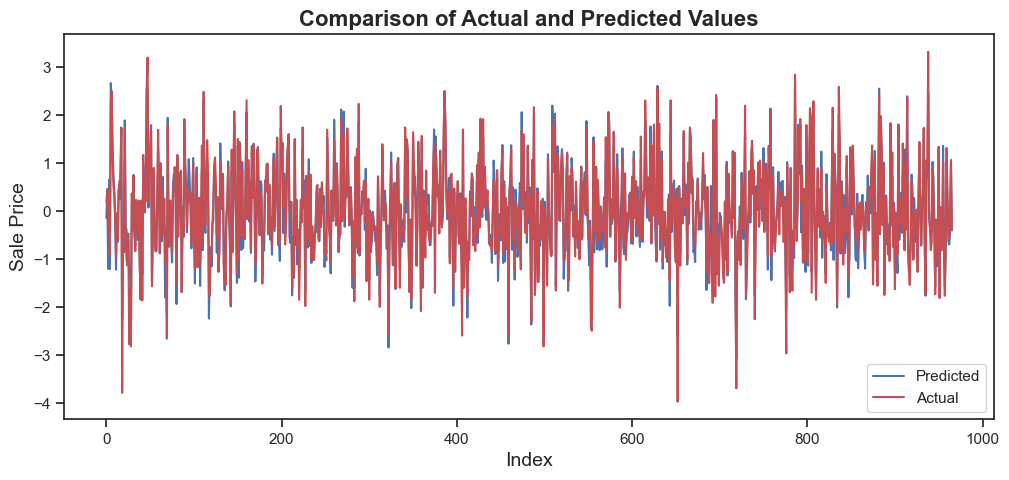

In [98]:
# Defining the index range based on the number of observations in y_train
index_range = list(range(len(y_train)))

# Initiating the plot with specified size
plt.figure(figsize=(12, 5))

# Plotting both actual and predicted values
plt.plot(index_range, y_pred_train, 'b-', linestyle='-', label='Predicted')
plt.plot(index_range, y_train, 'r-', linestyle='-', label='Actual')

# Adding title and labels with updated formatting
plt.title('Comparison of Actual and Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)

# Adding a legend to distinguish between actual and predicted values
plt.legend()

# Displaying the plot
plt.show()

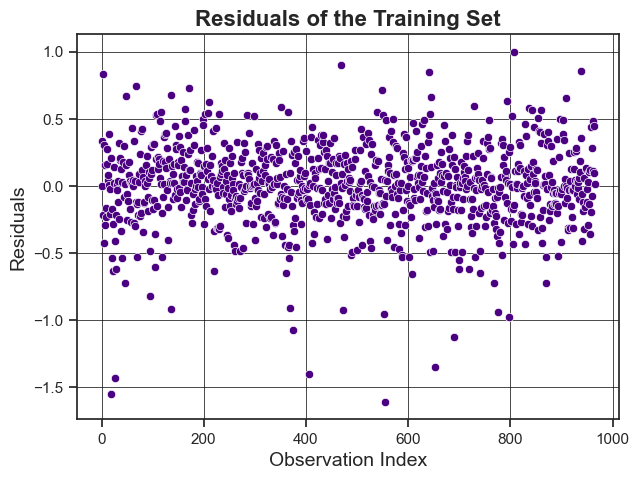

In [99]:
# Calculating the residuals for the training set
residuals_train_l = y_train - y_pred_train

# Plotting the residuals
plt.figure(figsize=(7, 5))
sns.scatterplot(x=range(len(residuals_train_l)), y=residuals_train_l, color='indigo', edgecolor='w')

# Setting the plot title and labels
plt.title('Residuals of the Training Set', fontsize=16, fontweight='bold')
plt.xlabel('Observation Index', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

# Adding grid lines for better readability
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')

# Displaying the plot
plt.show()

**Observation:**

The residuals are distributed around the zero line and show no dependence on one another.

##### 9.2.1.2 Test Set

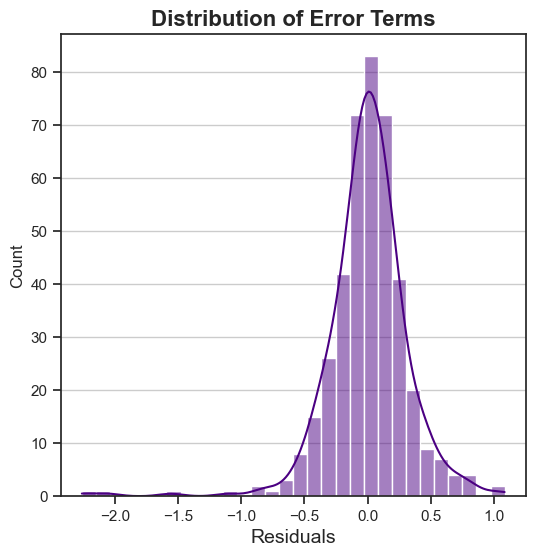

In [100]:
# Calculating the residuals for the test set
residuals_test_l = y_test - y_pred_test

# Plotting the histogram of residuals
plt.figure(figsize=(6, 6))
sns.histplot(residuals_test_l, bins=30, color='indigo', kde=True)

# Setting the title and labels for the plot
plt.title('Distribution of Error Terms', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)

# Adding grid lines to the plot for better readability
plt.grid(axis='y')
plt.show()

**Observation:**

The distribution of error terms appears to be roughly normal with a mean around zero, confirming our initial assumption for the linear regression model.

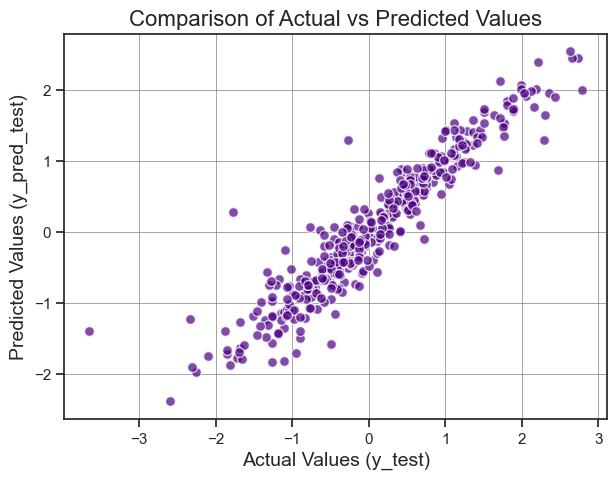

In [101]:
# Setting the style for the plot
sns.set(style='ticks')

# Initiating the plot with specified dimensions
plt.figure(figsize=(7, 5))

# Creating the scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred_test, alpha=0.7, color='indigo', edgecolor='w', s=50)

# Customizing the title and axis labels
plt.title('Comparison of Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values (y_test)', fontsize=14)
plt.ylabel('Predicted Values (y_pred_test)', fontsize=14)

# Adding grid lines for better readability and displaying the plot
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.show()

In [102]:
y_test.shape

(415,)

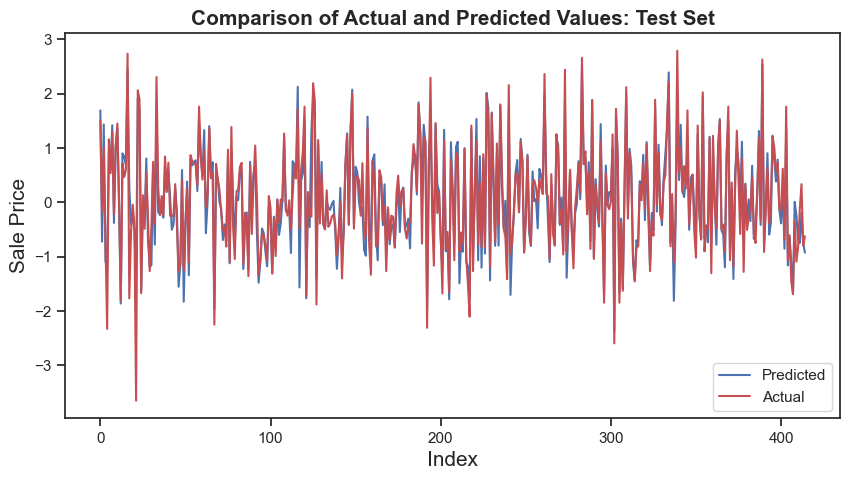

In [103]:
# Creating a sequence of indices for the number of observations in the test set
indices = list(range(415))

# Plotting the actual and predicted values
plt.figure(figsize=(10, 5))
plt.plot(indices, y_pred_test, 'b-', label='Predicted')
plt.plot(indices, y_test, 'r-', label='Actual')

# Adding title and labels with updated styling
plt.title('Comparison of Actual and Predicted Values: Test Set', fontsize=15, fontweight='bold')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Sale Price', fontsize=15)

# Adding a legend to distinguish between actual and predicted values
plt.legend()

# Displaying the plot
plt.show()

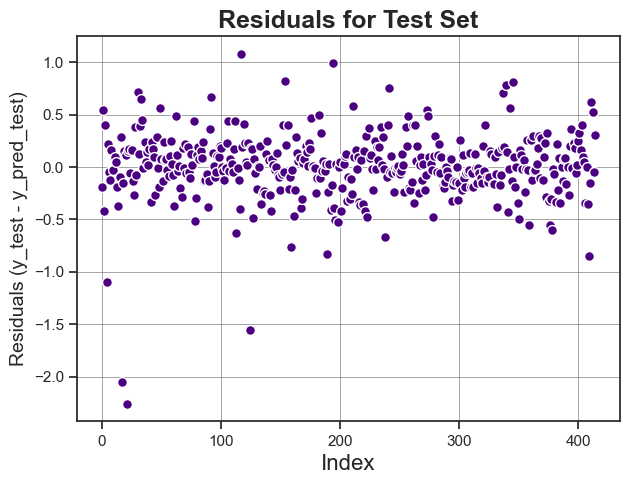

In [104]:
# Generating index values for the test set observations
index_values = range(415)

# Calculating the residuals for the test set
residuals_test_set = y_test - y_pred_test

# Creating a scatter plot for the residuals
plt.figure(figsize=(7, 5))
plt.scatter(index_values, residuals_test_set, color='indigo', edgecolor='w',s=50)

# Setting the title and labels for the plot
plt.title('Residuals for Test Set', fontsize=18, fontweight='bold')
plt.xlabel('Index', fontsize=16)
plt.ylabel('Residuals (y_test - y_pred_test)', fontsize=14)

# Enabling grid lines for better readability
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')

# Displaying the plot
plt.show()

**Observation:**

The residuals are distributed around the zero line and exhibit no interdependence.

# Subjective Questions:

### **Question 1**

`What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?`

*Previously determined best alpha values for ridge and lasso regression models*

best_alpha_ridge = `8.0`   # Best alpha for Ridge Regression, as calculated earlier <br>
best_alpha_lasso = `0.001` # Best alpha for Lasso Regression, as calculated earlier <br>

Changes to the model when we double the value of alpha for both ridge and lasso regression

#### **Ridge Regression with alpha=16.0**

In [105]:
# Define the Ridge regression model with an updated alpha value
updated_alpha = 16
ridge_model = Ridge(alpha=updated_alpha)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Output the intercept and coefficients of the model
updated_intercept_ridge = ridge_model.intercept_
updated_coefficients_ridge = ridge_model.coef_

# Display the results
print(f"Intercept: {updated_intercept_ridge}")
print(f"Coefficients: {updated_coefficients_ridge}")

Intercept: -0.1296606114567678
Coefficients: [ 0.24224166  0.15628609  0.10582416  0.1456706   0.35751861  0.10847221
 -0.27847847  0.02328501  0.15068923  0.00392081 -0.13762511 -0.19444553
  0.08085395  0.20222076  0.16677873 -0.08084691  0.1565555  -0.05164921
 -0.10782731 -0.1159138  -0.10064093 -0.07962394 -0.00295994 -0.07494303
  0.11547805 -0.10354892 -0.06553052  0.12225787  0.01599864 -0.05475906
  0.06061098  0.02551161 -0.0294213  -0.02358916  0.03091463 -0.01717715
  0.05451808  0.04739797  0.04734031  0.05829194 -0.02658924 -0.0303841
  0.04508568 -0.04973488  0.05122138 -0.07733566  0.11897601  0.02918533
 -0.06086114 -0.10235333]


In [106]:
# Predictions using the Ridge Regression Model
predictions_train = ridge_model.predict(X_train)
predictions_test = ridge_model.predict(X_test)

# Evaluation metrics for the Ridge Regression Model
evaluation_metrics = {
    'Train Set': {
        'R2 Score': r2_score(y_train, predictions_train),
        'MSE': mean_squared_error(y_train, predictions_train),
        'MAE': mean_absolute_error(y_train, predictions_train),
        'RMSE': np.sqrt(mean_squared_error(y_train, predictions_train))
    },
    'Test Set': {
        'R2 Score': r2_score(y_test, predictions_test),
        'MSE': mean_squared_error(y_test, predictions_test),
        'MAE': mean_absolute_error(y_test, predictions_test),
        'RMSE': np.sqrt(mean_squared_error(y_test, predictions_test))
    }
}

# Displaying the evaluation metrics
print("Ridge Regression Model Performance (Doubled Alpha Model, alpha=16):\n" + "*" * 50)
for set_name, metrics in evaluation_metrics.items():
    print(f"\n{set_name} Metrics:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
print("*" * 50)

Ridge Regression Model Performance (Doubled Alpha Model, alpha=16):
**************************************************

Train Set Metrics:
R2 Score: 0.9118928405717794
MSE: 0.08810715942822064
MAE: 0.21267431891866817
RMSE: 0.2968285017113765

Test Set Metrics:
R2 Score: 0.8904731985528808
MSE: 0.10617901905032019
MAE: 0.21782052246333078
RMSE: 0.32585122226304475
**************************************************


In [107]:
# Constructing the DataFrame with features and coefficients
ridge_coefficients_df = pd.DataFrame({
    'Features': X_train.columns,
    'Coefficient': ridge_model.coef_.round(4),
    'Abs_Coefficient': abs(ridge_model.coef_).round(4)
}).sort_values('Abs_Coefficient', ascending=False).reset_index(drop=True)

# Displaying the top 10 features with the highest absolute coefficient values
ridge_coefficients_df.head(10)

Features  Coefficient  Abs_Coefficient
0             GrLivArea       0.3575           0.3575
1           PropertyAge      -0.2785           0.2785
2           OverallQual       0.2422           0.2422
3           MSZoning_FV       0.2022           0.2022
4        MSSubClass_160      -0.1944           0.1944
5           MSZoning_RL       0.1668           0.1668
6  Neighborhood_Crawfor       0.1566           0.1566
7           OverallCond       0.1563           0.1563
8         MSSubClass_70       0.1507           0.1507
9           TotalBsmtSF       0.1457           0.1457

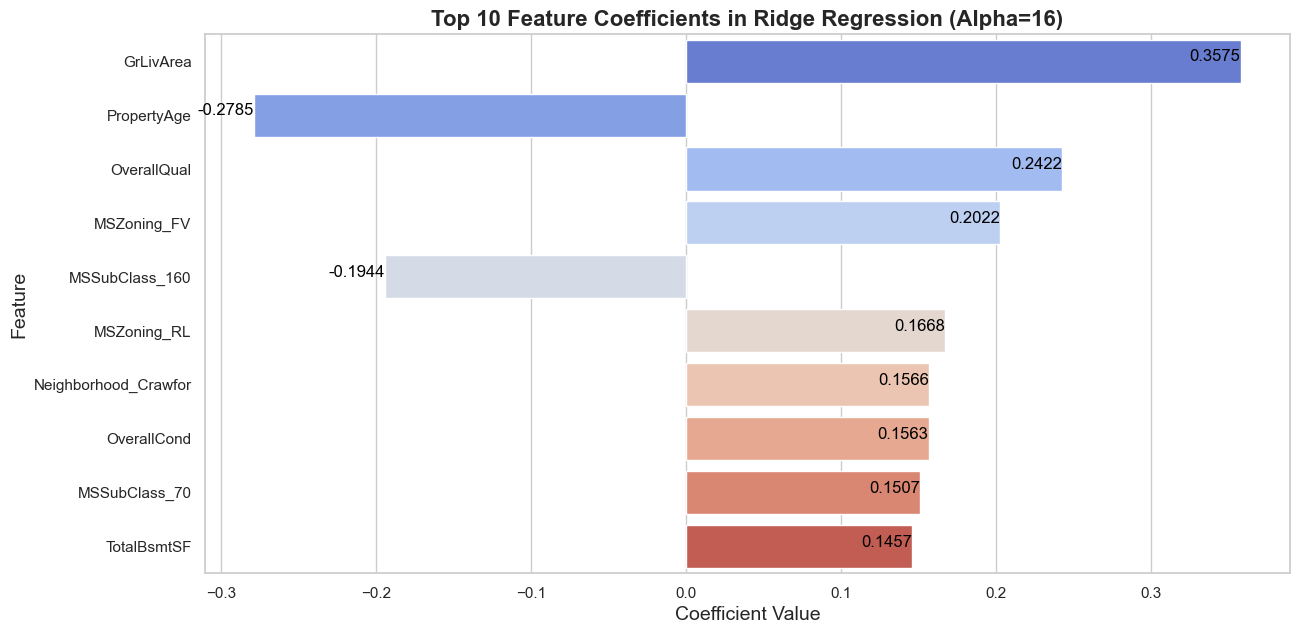

In [108]:
# Extracting the top 10 coefficients for plotting
top_coefficients_ridge = ridge_coefficients_df.head(10)

# Setting the aesthetic style of the plots
sns.set_style('whitegrid')

# Creating the bar plot
plt.figure(figsize=(14, 7))
barplot = sns.barplot(x='Coefficient', y='Features', data=top_coefficients_ridge, palette='coolwarm')

# Annotating the bar plot with the coefficient values
for index, row in top_coefficients_ridge.iterrows():
    barplot.text(row.Coefficient, index, round(row.Coefficient, 4), color='black', ha="right")

# Setting the title and labels
plt.title('Top 10 Feature Coefficients in Ridge Regression (Alpha=16)', fontsize=16, fontweight='bold')
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Displaying the plot
plt.show()

In [109]:
# Displaying the top 10 predictor variables for the Ridge Regression model with alpha=16
print("Ridge Regression Analysis (Alpha doubled from 8 to 16):")
print("*" * 80)
top_10_predictors = top_coefficients_ridge['Features'].tolist()
print("Top 10 predictors after updating alpha are:")
print(top_10_predictors)
print("*" * 80)

Ridge Regression Analysis (Alpha doubled from 8 to 16):
********************************************************************************
Top 10 predictors after updating alpha are:
['GrLivArea', 'PropertyAge', 'OverallQual', 'MSZoning_FV', 'MSSubClass_160', 'MSZoning_RL', 'Neighborhood_Crawfor', 'OverallCond', 'MSSubClass_70', 'TotalBsmtSF']
********************************************************************************


#### **Lasso Regression with alpha=0.002**

In [110]:
# Setting up the Lasso model with the updated alpha value
new_alpha = 0.002
lasso_model = Lasso(alpha=new_alpha)

# Training the model with the training data
lasso_model.fit(X_train, y_train)

# Printing the intercept and coefficients of the trained model
print(f"Intercept: {lasso_model.intercept_}")
print(f"Coefficients:{lasso_model.coef_}")

Intercept: -0.1442111661026193
Coefficients:[ 0.24515523  0.15904187  0.10325384  0.14258939  0.36425581  0.10472228
 -0.29690021  0.          0.17230256 -0.         -0.15993685 -0.26990325
  0.06157464  0.28056602  0.18252235 -0.          0.21391105 -0.00119804
 -0.04132858 -0.03617834 -0.07573251 -0.04201532 -0.         -0.05123676
  0.12337558 -0.04024964 -0.02299667  0.13158657  0.         -0.
  0.         -0.         -0.03821582 -0.          0.00132769 -0.01656393
  0.          0.          0.01854981  0.02838593 -0.         -0.
  0.         -0.          0.         -0.          0.12763467  0.
 -0.00616419 -0.09043783]


In [111]:
# Function to make predictions
def predict(model, X):
    return model.predict(X)

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, mae, rmse

# Function to print metrics
def print_metrics(set_name, metrics):
    print("*" * 40)
    print(f"For {set_name} Set:")
    print(f"R2 score: {metrics[0]}")
    print(f"MSE score: {metrics[1]}")
    print(f"MAE score: {metrics[2]}")
    print(f"RMSE score: {metrics[3]}")
    print("*" * 40)

# Lasso Regression Model Predictions
y_pred_train_l = predict(lasso_model, X_train)
y_pred_test_l = predict(lasso_model, X_test)

# Calculate metrics
metrics_train = calculate_metrics(y_train, y_pred_train_l)
metrics_test = calculate_metrics(y_test, y_pred_test_l)

# Print metrics
print("For Lasso Regression Model: (Doubled alpha model, alpha=0.002)")
print_metrics("Train", metrics_train)
print_metrics("Test", metrics_test)

For Lasso Regression Model: (Doubled alpha model, alpha=0.002)
****************************************
For Train Set:
R2 score: 0.9103228278462834
MSE score: 0.0896771721537166
MAE score: 0.21401154178442824
RMSE score: 0.29946147023234326
****************************************
****************************************
For Test Set:
R2 score: 0.8920884694594363
MSE score: 0.10461312031053645
MAE score: 0.21611414123017147
RMSE score: 0.3234395156911667
****************************************


In [112]:
# Function to create a dataframe of features and coefficients
def create_lasso_df(model, feature_names):
    coefficients = model.coef_.round(4)
    lasso_data = {
        'Features': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient_Lasso': abs(coefficients)
    }
    df = pd.DataFrame(lasso_data)
    df.sort_values(by='Abs_Coefficient_Lasso', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

# Display top 10 features with the highest absolute coefficients
top_features_lasso_df = create_lasso_df(lasso_model, X_train.columns)
top_features_lasso_df.head(10)

Features  Coefficient  Abs_Coefficient_Lasso
0             GrLivArea       0.3643                 0.3643
1           PropertyAge      -0.2969                 0.2969
2           MSZoning_FV       0.2806                 0.2806
3        MSSubClass_160      -0.2699                 0.2699
4           OverallQual       0.2452                 0.2452
5  Neighborhood_Crawfor       0.2139                 0.2139
6           MSZoning_RL       0.1825                 0.1825
7         MSSubClass_70       0.1723                 0.1723
8         MSSubClass_90      -0.1599                 0.1599
9           OverallCond       0.1590                 0.1590

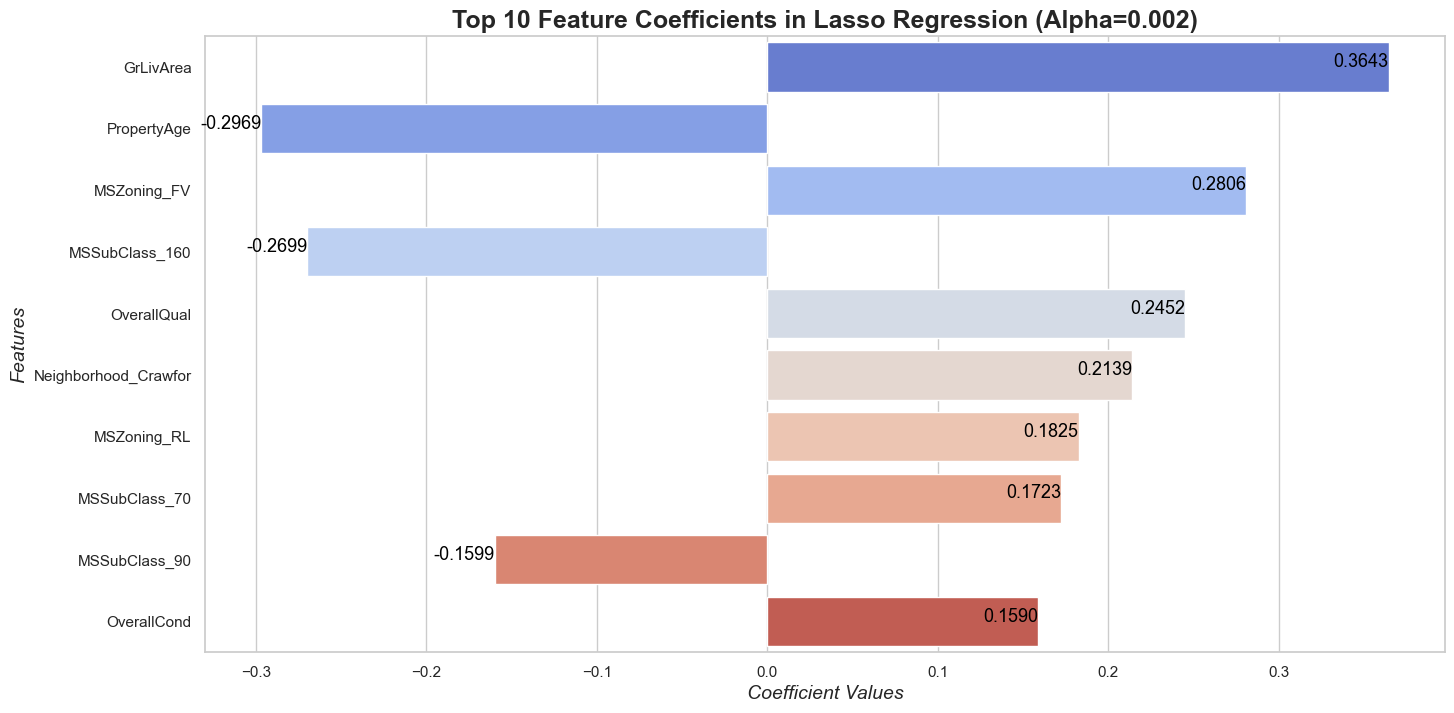

In [113]:
# Function to plot the top 10 coefficients
def plot_top_coefficients(df, top_n=10, model_name='Lasso Regression'):
    # Extract top n features
    top_features_df = df.head(top_n)
    
    # Set plot style
    sns.set(style='whitegrid')
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Create barplot
    sns.barplot(x='Coefficient', y='Features', data=top_features_df, palette='coolwarm', ax=ax)
    
    # Set labels and title
    ax.set_xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
    ax.set_ylabel('Features', fontsize=14, fontstyle='italic')
    ax.set_title(f'Top {top_n} Feature Coefficients in {model_name} (Alpha=0.002)', fontsize=18, fontweight='bold')
    
    # Annotate bars with coefficient values
    for index, row in top_features_df.iterrows():
        ax.text(row['Coefficient'], index, f'{row["Coefficient"]:.4f}', color='black', ha="right", fontsize=13)
    
    # Show plot
    plt.show()

# Call function to plot the top 10 coefficients
plot_top_coefficients(top_features_lasso_df, top_n=10)

In [114]:
print("For Lasso Regression Analysis (Alpha doubled from 0.001 to 0.002): \n","*"*125)
print("Top 10 predictors after updating alpha are:\n\n",\
      list(top_features_lasso_df['Features'].head(10)),"\n", "*"*125)

For Lasso Regression Analysis (Alpha doubled from 0.001 to 0.002): 
 *****************************************************************************************************************************
Top 10 predictors after updating alpha are:

 ['GrLivArea', 'PropertyAge', 'MSZoning_FV', 'MSSubClass_160', 'OverallQual', 'Neighborhood_Crawfor', 'MSZoning_RL', 'MSSubClass_70', 'MSSubClass_90', 'OverallCond'] 
 *****************************************************************************************************************************


### **Question 2**

`You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?`

*Solution in the Subjective Questions pdf File*

### **Question 3**

`After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?`

In [115]:
# Function to remove features from dataframe
def remove_features(dataframe, features_to_remove):
    dataframe = dataframe.drop(features_to_remove, axis=1)
    return dataframe

# Importing top 5 features from the original Lasso model
print(f"Top 5 features in original lasso model (dropped):\n{top_five_features}")

# New dataframe without the top 5 features
housing_df_without_top5 = remove_features(df_new1, top_five_features)

# Display the first few rows of the updated dataframe
housing_df_without_top5.head()

Top 5 features in original lasso model (dropped):
['GrLivArea', 'MSZoning_FV', 'MSSubClass_160', 'Exterior1st_BrkComm', 'PropertyAge']


LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtUnfSF  TotalBsmtSF  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0        150          856             1         2         1             3   
1        284         1262             0         2         0             3   
2        434          920             1         2         1             3   
3        540          756             1         1         0             3   
4        490         1145             1         2         1             4   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  \
0           0         548           0           61  12.247699   
1           1         460         298            0  12.109016   
2           1         608           0           42  12.317171   
3           1         642           0           35  11.849405   
4           1         836         192           84  12.429220   

   WhetherRemodelled  d_LotShape  d_BsmtQual  d_BsmtExposure  d_HeatingQC  \
0                  0           3           4               1            5   
1                  0           3           4               4            5   
2                  1           2           4               2            5   
3                  1           2           3               1            4   
4                  0           2           4               3            5   

   d_GarageFinish  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0               2              0              0              0              0   
1               2              0              0              0              0   
2               2              0              0              0              0   
3               1              0              0              0              0   
4               2              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_180  MSSubClass_190  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   MSZoning_RH  MSZoning_RL  Neighborhood_Blueste  Neighborhood_BrDale  \
0            0            1                     0                    0   
1            0            1                     0                    0   
2            0            1                     0                    0   
3            0            1                     0                    0   
4            0            1                

In [116]:
# Function to identify columns with binary values
def get_binary_columns(dataframe):
    # Find columns where the number of unique values is 2
    binary_columns = dataframe.columns[dataframe.apply(lambda col: col.nunique() == 2)]
    return binary_columns.tolist()

# Using the function to find binary columns in 'housing_df_without_top5'
binary_columns_list = get_binary_columns(housing_df_without_top5)

#### **Train Test Split**

In [117]:
# Setting a seed for reproducibility
np.random.seed(0)

# Splitting the dataframe into train and test sets
housing_df_without_top5_train_data, housing_df_without_top5_test_data = train_test_split(housing_df_without_top5, train_size=0.7, test_size=0.3, random_state=100)

#### **Feature Scaling**

In [118]:
# Function to separate and scale non-binary columns
def scale_and_concat(df, binary_cols):
    # Separate binary columns
    binary_df = df.loc[:, binary_cols]
    
    # Drop binary columns from the original dataframe
    df = df.drop(binary_cols, axis=1)
    
    # Initialize the StandardScaler
    scaler = StandardScaler()
    
    # Scale the non-binary columns
    df[df.columns] = scaler.fit_transform(df)
    
    # Concatenate the binary columns back to the scaled dataframe
    df = pd.concat([df, binary_df], axis=1)
    
    return df

# Applying the function to train and test data
housing_df_without_top5_train_data = scale_and_concat(housing_df_without_top5_train_data, binary_columns_list)
housing_df_without_top5_test_data = scale_and_concat(housing_df_without_top5_test_data, binary_columns_list)

In [119]:
# Extracting target variable 'SalePrice' for train and test sets

y_train = housing_df_without_top5_train_data['SalePrice']
y_test = housing_df_without_top5_test_data['SalePrice']

In [120]:
# Selecting feature variables for train and test sets
X_train = housing_df_without_top5_train_data.drop('SalePrice',axis=1)
X_test = housing_df_without_top5_test_data.drop('SalePrice',axis=1)

#### **Recursive Feature Elimination**

In [121]:
# Function to perform RFE and fit the model
def perform_rfe(X, y, model, num_features):
    rfe_model = RFE(estimator=model, n_features_to_select=num_features)
    rfe_model.fit(X, y)
    return rfe_model

# Linear Regression Model
linear_model = LinearRegression()

# Performing RFE with 50 features
rfe_selected = perform_rfe(X_train, y_train, linear_model, 50)

In [122]:
# Function to zip features with RFE support and ranking
def zip_features_with_rfe(columns, support, ranking):
    return list(zip(columns, support, ranking))

# Creating a list of feature information
feature_info = zip_features_with_rfe(X_train.columns, rfe_selected.support_, rfe_selected.ranking_)
feature_info

[('LotFrontage', False, 24),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 45),
 ('BsmtFinSF1', False, 22),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('BsmtFullBath', False, 35),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 39),
 ('Fireplaces', False, 14),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 25),
 ('OpenPorchSF', False, 41),
 ('d_LotShape', False, 50),
 ('d_BsmtQual', False, 18),
 ('d_BsmtExposure', False, 44),
 ('d_HeatingQC', False, 21),
 ('d_GarageFinish', False, 48),
 ('WhetherRemodelled', False, 46),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 38),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', True, 1),
 ('MSSubClass_85', False, 34),
 ('MSSubClass_90', False, 37),
 ('MSSubClass_120', False, 9),
 ('MSSubClass_180', False, 23),
 ('MSSubClass_190', Fals

In [123]:
# Getting the supported columns for RFE
supported_columns = X_train.columns[rfe_selected.support_]
supported_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'FullBath', 'HalfBath', 'GarageArea', 'MSSubClass_30', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace',
       'Exterior2nd_Stone', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'RoofStyle_Gambrel', 

In [124]:
# Function to create a dataframe of RFE supported features
def create_rfe_features_df(zip_data, support_column='rfe_support'):
    rfe_df = pd.DataFrame(zip_data, columns=['Features', support_column, 'rfe_ranking'])
    rfe_df = rfe_df[rfe_df[support_column] == True]
    rfe_df.reset_index(drop=True, inplace=True)
    return rfe_df

# Creating a dataframe for the top 50 RFE supported features
rfe_features_df = create_rfe_features_df(feature_info)
rfe_features_df

Features  rfe_support  rfe_ranking
0                LotArea         True            1
1            OverallQual         True            1
2            OverallCond         True            1
3              BsmtUnfSF         True            1
4            TotalBsmtSF         True            1
5               FullBath         True            1
6               HalfBath         True            1
7             GarageArea         True            1
8          MSSubClass_30         True            1
9          MSSubClass_45         True            1
10         MSSubClass_50         True            1
11         MSSubClass_60         True            1
12         MSSubClass_70         True            1
13         MSSubClass_75         True            1
14         MSSubClass_80         True            1
15         LotConfig_FR3         True            1
16  Neighborhood_Blueste         True            1
17   Neighborhood_BrDale         True            1
18  Neighborhood_BrkSide         True            1
19  Neighborhood_ClearCr         True            1
20  Neighborhood_CollgCr         True            1
21  Neighborhood_Edwards         True            1
22  Neighborhood_Gilbert         True            1
23   Neighborhood_IDOTRR         True            1
24  Neighborhood_MeadowV         True            1
25  Neighborhood_Mitchel         True            1
26    Neighborhood_NAmes         True            1
27  Neighborhood_NPkVill         True            1
28   Neighborhood_NWAmes         True            1
29  Neighborhood_OldTown         True            1
30    Neighborhood_SWISU         True            1
31   Neighborhood_Sawyer         True            1
32  Neighborhood_SawyerW         True            1
33  Neighborhood_StoneBr         True            1
34   Neighborhood_Timber         True            1
35  Neighborhood_Veenker         True            1
36   Exterior2nd_Brk Cmn         True            1
37   Exterior2nd_BrkFace         True            1
38     Exterior2nd_Stone         True            1
39     HouseStyle_2.5Fin         True            1
40     HouseStyle_2.5Unf         True            1
41       Foundation_Slab         True            1
42      Foundation_Stone         True            1
43       Foundation_Wood         True            1
44     RoofStyle_Gambrel         True            1
45     RoofStyle_Mansard         True            1
46     Exterior1st_Stone         True            1
47     GarageType_Attchd         True            1
48    GarageType_BuiltIn         True            1
49    GarageType_CarPort         True            1

In [125]:
# Assigning top 50 RFE supported columns to X_train_rfe

X_train_rfe = X_train[supported_columns]

In [126]:
# Updating X_train and X_test with RFE supported features

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

#### **Model Building: Lasso Regression Model**

In [127]:
# Function to perform Lasso Regression with cross-validation
def lasso_regression_cv(X, y, alpha_values, num_folds):
    # Define the Lasso Regression model
    lasso_model = Lasso()
    
    # Define the parameters for cross-validation
    params = {'alpha': alpha_values}
    
    # Set up the GridSearchCV object
    grid_search_cv = GridSearchCV(estimator=lasso_model,
                                  param_grid=params,
                                  scoring='neg_mean_absolute_error',
                                  cv=num_folds,
                                  return_train_score=True,
                                  verbose=1)
    
    # Fit the model
    grid_search_cv.fit(X, y)
    
    return grid_search_cv

# List of alphas to consider
alpha_list = [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]

# Number of folds for cross-validation
number_of_folds = 5

# Perform Lasso Regression with cross-validation
lasso_cv_results = lasso_regression_cv(X_train, y_train, alpha_list, number_of_folds)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


In [128]:
# Select and sort the relevant columns
sorted_lasso_cv_scores = pd.DataFrame(lasso_cv_results.cv_results_)

# Displaying the sorted mean scores
sorted_lasso_cv_scores[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
4       0.0004         -0.234596        -0.249241                1
5       0.0005         -0.235143        -0.249248                2
6       0.0006         -0.235763        -0.249445                3
3       0.0003         -0.234108        -0.249470                4
2       0.0002         -0.233778        -0.249820                5
7       0.0007         -0.236438        -0.249826                6
8       0.0008         -0.237125        -0.250209                7
1       0.0001         -0.233522        -0.250210                8
9       0.0009         -0.237848        -0.250543                9
0      0.00001         -0.233426        -0.250817               10
10       0.001         -0.238539        -0.251007               11
11       0.005         -0.258606        -0.264667               12
12        0.01         -0.270600        -0.274730               13
13        0.05         -0.296756        -0.299077               14
14         0.1         -0.323270        -0.324466               15
15         0.2         -0.384300        -0.386380               16
16         0.3         -0.453846        -0.456101               17
17         0.4         -0.518116        -0.520151               18
18         0.5         -0.579658        -0.581251               19
19         0.6         -0.636055        -0.637773               20
20         0.7         -0.697506        -0.699013               21
21         0.8         -0.761580        -0.762717               22
35         100         -0.775470        -0.775675               23
34          50         -0.775470        -0.775675               23
33          20         -0.775470        -0.775675               23
32        10.0         -0.775470        -0.775675               23
31         9.0         -0.775470        -0.775675               23
30         8.0         -0.775470        -0.775675               23
29         7.0         -0.775470        -0.775675               23
28         6.0         -0.775470        -0.775675               23
27         5.0         -0.775470        -0.775675               23
26         4.0         -0.775470        -0.775675               23
25         3.0         -0.775470        -0.775675               23
24         2.0         -0.775470        -0.775675               23
23         1.0         -0.775470        -0.775675               23
22         0.9         -0.775470        -0.775675               23
36         500         -0.775470        -0.775675               23
37        1000         -0.775470        -0.775675               23

#### **Focusing on smaller alpha values based on above data**

In [129]:
##Plotting a magnified graph for a lower range of alpha.

lasso_model = Lasso()

# List of alphas for the magnified range

magnified_alpha_range = {'alpha': [0.00001, 0.00009, 0.00005, 0.00003, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02, 0.05]}

# Number of folds for cross-validation
number_of_folds = 5

magnified_lasso_cv_results = GridSearchCV(estimator = lasso_model,                         
                        param_grid = magnified_alpha_range, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = number_of_folds, 
                        return_train_score=True,
                        verbose = 1)            

magnified_lasso_cv_results.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 9e-05, 5e-05, 3e-05, 0.0001, 0.0002,
                                   0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                                   0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [130]:
# Select and sort the relevant score columns
sorted_lasso_scores  = pd.DataFrame(magnified_lasso_cv_results.cv_results_)

# Displaying the sorted mean scores from the magnified Lasso CV results
sorted_lasso_scores[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
7       0.0004         -0.234596        -0.249241                1
8       0.0005         -0.235143        -0.249248                2
9       0.0006         -0.235763        -0.249445                3
6       0.0003         -0.234108        -0.249470                4
5       0.0002         -0.233778        -0.249820                5
10      0.0007         -0.236438        -0.249826                6
11      0.0008         -0.237125        -0.250209                7
4       0.0001         -0.233522        -0.250210                8
1      0.00009         -0.233508        -0.250271                9
2      0.00005         -0.233457        -0.250538               10
12      0.0009         -0.237848        -0.250543               11
3      0.00003         -0.233437        -0.250671               12
0      0.00001         -0.233426        -0.250817               13
13       0.001         -0.238539        -0.251007               14
14       0.005         -0.258606        -0.264667               15
15        0.01         -0.270600        -0.274730               16
16        0.02         -0.281924        -0.284801               17
17        0.05         -0.296756        -0.299077               18

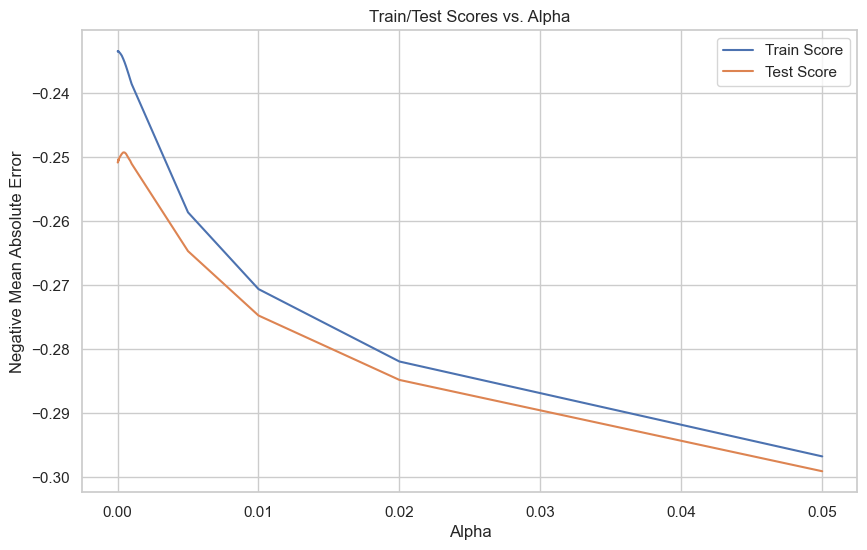

In [131]:
# Function to plot mean train and test scores with alpha
def plot_scores_with_alpha(cv_results_df):
    # Ensure alpha is of type float
    cv_results_df['param_alpha'] = cv_results_df['param_alpha'].astype('float64')
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(cv_results_df['param_alpha'], cv_results_df['mean_train_score'], label='Train Score')
    plt.plot(cv_results_df['param_alpha'], cv_results_df['mean_test_score'], label='Test Score')
    plt.xlabel('Alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title('Train/Test Scores vs. Alpha')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calling the function with the Lasso CV results dataframe
plot_scores_with_alpha(sorted_lasso_scores)


In [132]:
# get the best estimator for lambda

magnified_lasso_cv_results.best_estimator_

Lasso(alpha=0.0004)

In [133]:
# Set the alpha value for Lasso
alpha_value = 0.0004

# Initialize and fit the Lasso model
model_lasso = Lasso(alpha=alpha_value)
model_lasso.fit(X_train, y_train)

# Output the intercept and coefficients
print(f"Intercept: {model_lasso.intercept_}")
print(f"Coefficients:\n{model_lasso.coef_}")

Intercept: 0.07584571170654805
Coefficients:
[ 0.09257452  0.30778982  0.13188774 -0.11390878  0.37373075  0.12144053
  0.09583899  0.15502864 -0.25033946 -0.16476066  0.07040289  0.26596687
  0.21617641  0.11803384  0.13878431 -0.         -0.         -0.45735369
 -0.17095864 -0.11092654 -0.1447268  -0.24559687 -0.12455549 -0.60633011
 -0.47223459 -0.27919006 -0.35014965 -0.12686095 -0.38044102 -0.47105564
 -0.10230161 -0.35523233 -0.18489726  0.10850556 -0.11484867 -0.05465814
 -0.43401763  0.17806416  0.2235303   0.18216979 -0.          0.36600412
  0.16512971 -0.02406037  0.09251517  0.09754496  0.          0.1060746
  0.33546336 -0.15548198]


In [134]:
# Create a dataframe of features and coefficients
coefficients_df = pd.DataFrame({
    'Features': X_train.columns,
    'Coefficient': model_lasso.coef_.round(4),
    'Abs_Coefficient': abs(model_lasso.coef_).round(4)
})

# Sort the dataframe by the absolute value of coefficients in descending order
coefficients_df.sort_values('Abs_Coefficient', ascending=False, inplace=True)

# Display the top 5 features with the highest absolute coefficients
coefficients_df.head(5)

Features  Coefficient  Abs_Coefficient
23   Neighborhood_IDOTRR      -0.6063           0.6063
24  Neighborhood_MeadowV      -0.4722           0.4722
29  Neighborhood_OldTown      -0.4711           0.4711
17   Neighborhood_BrDale      -0.4574           0.4574
36   Exterior2nd_Brk Cmn      -0.4340           0.4340

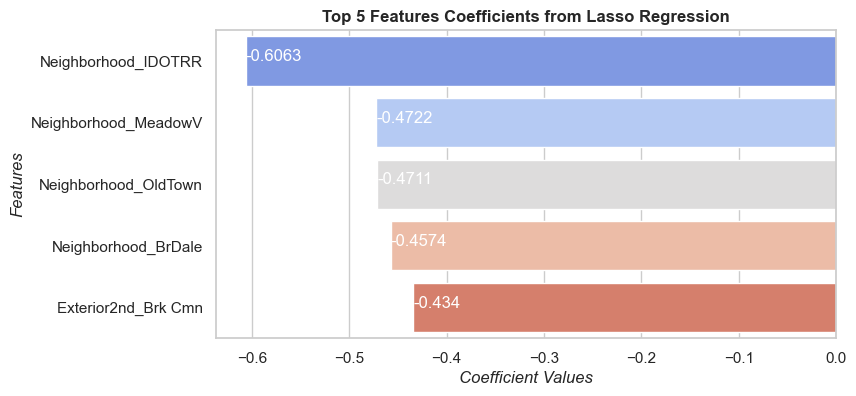

In [135]:
# Extracting the top 5 features from the Lasso model
top5_features = coefficients_df.head(5)

# Setting the style for the plot
sns.set_style('whitegrid')

# Creating the plot
plt.figure(figsize=(8, 4))
barplot = sns.barplot(x='Coefficient', y='Features', data=top5_features, palette='coolwarm')

# Setting the title and labels
plt.title('Top 5 Features Coefficients from Lasso Regression', fontsize=12, fontweight='bold')
plt.xlabel('Coefficient Values', fontsize=12, fontstyle='italic')
plt.ylabel('Features', fontsize=12, fontstyle='italic')

# Annotating the bars with coefficient values
c= top5_features['Coefficient']
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=12, color='white')

# Displaying the plot
plt.show()


In [136]:
# Displaying the top 5 most important predictor variables
print("For New Lasso Regression Model (After eliminating the top 5 features from the original model):")
print("*" * 125)
print("The top 5 new most important predictor variables are as follows:\n")
print(top5_features['Features'].to_list())
print("*" * 125)

For New Lasso Regression Model (After eliminating the top 5 features from the original model):
*****************************************************************************************************************************
The top 5 new most important predictor variables are as follows:

['Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_OldTown', 'Neighborhood_BrDale', 'Exterior2nd_Brk Cmn']
*****************************************************************************************************************************


### **Question 4**

`How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?`

*Solution in the Subjective Questions pdf file*